# DA301: Turtle Games 
#### Prepared by Lilliana Golob

## Import libraries and data

In [1]:
# Import libraries and packages

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data analysis
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics and math
import scipy
from scipy import stats
import math

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

# Regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

# Decision trees
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Sentiment analysis
import nltk
import contractions
import os
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from collections import Counter
from collections import defaultdict


[nltk_data] Downloading package punkt to /Users/lilliana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilliana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lilliana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lilliana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Import data
reviews_original = pd.read_csv('turtle_reviews.csv')

# Check data loaded (rows, columns)
reviews_original.shape

(2000, 11)

## Functions

### Functions - review data

In [3]:
# Function to review and validate the data

def review_data(df):
    """
    Review the data in a dataframe returning:
    datatypes, missing values, descriptive statistics, 
    duplicates and unique values.
    """
    
    print("COLUMN NAMES AND DATA TYPES")
    info_df = df.info()
    print("")
       
    print("MISSING VALUES")
    missing_df = df.isnull().sum()
    print(missing_df)
    print("")
    
    print("COUNT OF DUPLICATES")
    dup_count = df.duplicated().sum()
    print(dup_count)
    print("")
    
    print("COUNT UNIQUE")
    unique_count = df.nunique()
    print(unique_count)
    print("")
          
    print("DESCRIPTIVE STATS")
    desc_stats = df.describe()
    print(desc_stats)
    print("")
    
    return

### Functions - linear regression

In [4]:
# Function to fit linear model using polyfit and create initial scatterplot

def slr_correlation_plot(df, dependent, independent):
    """
    Print scatterplot with a trendline and correlation calculation
    for simple linear regresssion using Numpy polyfit model
    with dependent/result variable (y co-ordinate) and
    one independent/predictor variable (x co-ordinate).
    """
    
    # Fit linear model
    slr = np.polyfit(df[independent], df[dependent], deg = 1)
        
    # Create scatterplot
    plt.figure(figsize = (12, 8))
    sns.scatterplot(x = df[independent], y = df[dependent])
    
    # Add trendline using polyval method to specify regression and independent variable
    trend = np.polyval(slr, df[independent])
    
    # Add trendline
    plt.plot(df[independent], trend, color = 'orange')
    
    # Add title
    plt.title(f"Initial scatterplot with trendline showing correlation between {dependent} and {independent}")
    
    # Calculate correlation rounded to 2 decimals
    correlation = round(df[independent].corr(df[dependent]), 2)
    
    return plt.show, print(f"Coefficients: {slr}\n"), print(f"Correlation between {dependent} and {independent}: {correlation}\n")

In [5]:
# Function to create OLS regression summary table

def ols_summary(df, dependent, independent):
    """
    Print regression summary table using OLS (ordinary least squares) method,
    and predicted values,
    first adding a constant to the model.
    """
    
    # Assign variables
    y = df[dependent]
    x = df[independent]
    
    # Add constant to regression model
    x = sm.add_constant(x)
    
    # Fit model
    ols_model = sm.OLS(y, x).fit()
        
    return print(f"INDEPENDENT VARIABLE: {independent} {ols_model.summary()}")

In [6]:
# Function to create residual plot

def residual_plot(df, dependent, independent):
    """
    Print residual plot which shows differences between 
    observed values and predicted values.
    """
    
    # Assign variables
    y = df[dependent]
    x = df[independent]
    
    # Fit model
    ols_model = sm.OLS(y, x).fit()
    
    # Predictions
    prediction = ols_model.predict(x)
    
    # Plot residual plot
    plt.figure(figsize=(12, 8))
    plt.scatter(prediction, ols_model.resid, alpha = 0.5)
    
    # Add horizontal line at y = zero to represent residual line
    plt.axhline(y=0, color='red', linestyle='--')
    
    # Add title and labels
    plt.title(f"Residual plot for {dependent} vs {independent}")
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    
    return plt.show()

In [7]:
# Function to create simple linear regression and create plot with regression line

def slr(df, dependent, independent):
    """
    Create simple linear regression model, reshape the data,
    split data into test and train (50/50 split)
    and output scatterplot on training data with regression line.
    """
    
    # Assign variables and reshape
    y = df[dependent].values.reshape(-1, 1)
    x = df[independent].values.reshape(-1, 1)

    # Create the model
    lr = LinearRegression()
    
    # Fit model
    lr.fit(x, y)
            
    # Split data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .50, random_state = 42)
    
    # Fit model to training data
    lr.fit(x_train, y_train)
    
    # Predict training set values
    y_predict = lr.predict(x_train)
       
    # Create scatterplot
    plt.figure(figsize = (12, 8))
    plt.scatter(x_train, y_train, color = 'orange', alpha = 0.5)
    
    # Add regression line
    plt.plot(x_train, y_predict, color = 'blue')
    
    # Add title and labels
    plt.title(f"Regression line for {dependent} vs {independent}")
    plt.xlabel(independent)
    plt.ylabel(dependent)
    
    return plt.show()

In [8]:
# Function to predict values for simple linear regression and determine accuracy, coefficient and intercept

def slr_predict(df, dependent, independent):
    """
    Create simple linear regression model and predict values,
    and print r-squared, intercept and coefficient values.
    """
    
    # Assign variables and reshape
    y = df[dependent].values.reshape(-1, 1)
    x = df[independent].values.reshape(-1, 1)

    # Create the model
    lr = LinearRegression()
    
    # Fit model
    lr.fit(x, y)
            
    # Split data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .50, random_state = 42)
    
    # Fit model to training data
    lr.fit(x_train, y_train)
    
    # Predict on x test
    y_pred = lr.predict(x_test)
       
    # Calculate R-squared on test data
    rsqu = round(lr.score(x_test, y_test), 2)
    
    # Calculate intercept
    inter = lr.intercept_
    
    # Calculate coefficient
    coef = lr.coef_
            
    return (print(f"\nR-squared value: {rsqu}\n"),
            print(f"\nIntercept value: {inter}\n"),
            print(f"\nCoefficient value: {coef}\n"), 
            print(f"Prediction based on {independent}:\n {y_pred}"))

### Functions - Sentiment analysis

In [9]:
# Function to preprocess data

def preprocess(df, column, col_clean):
    """
    Preprocessing data so can perform sentiment analysis and,
    storing the cleaned up data in a new column (col_clean).
    """
    
    # Create new column to hold clean text
    df[col_clean] = df[column]
    
    # Make lowercase  
    df[col_clean] = df[column].str.lower()
    
    # Remove URLs
    df[col_clean] = df[col_clean].str.replace('http\S+|www.\S+', '', regex = True)
    
    # Remove #hashtags
    df[col_clean] = df[col_clean].str.replace('#', '', regex = True)
        
    # Expand contractions
    df[col_clean] = df[col_clean].apply(lambda x: contractions.fix(x))
    
    # Remove punctuation and special characters
    df[col_clean] = df[col_clean].str.replace('[^\w\s]', '', regex = True)
    
    # Remove extra lines
    df[col_clean] = df[col_clean].str.replace('\n',' ')
    
    # Remove stopwords except 'not'
    stop_words = set(stopwords.words('english')) - {'not'}  
    df[col_clean] = df[col_clean].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    
    return df.head(10)

## Data validation

In [10]:
# Use function to review data

review_data(reviews_original)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB

MISSING VALUES
gender                    0
age                       0
remuneration (k£)         0
spending_sco

<Axes: xlabel='loyalty_points'>

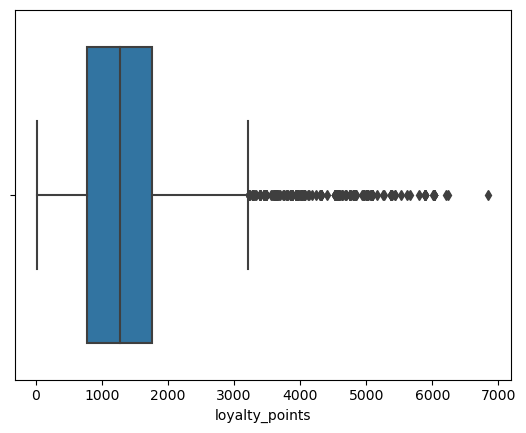

In [11]:
# Boxplot to see data distribution through quartiles for loyalty points

sns.boxplot(x = reviews_original["loyalty_points"])

##### Observations
DATA VALIDATION
- Datatypes look suitable and there no duplicates or missing values to manage.
- There are 5 education categories, and 200 different products. Product data type is INT because they are numeric codes and will be difficult to include in our analysis.
- Loyalty points data ranges from 25 to 6847, with a mean average of 1578. The standard deviation is high (1283) which indicates data are more spread out from the mean. 
- This is confirmed visually with the boxplot where the spread of data is very large across the quartiles and there appears to be quite a few outliers.

In [12]:
# Remove unnecessary columns language and platform
# Create new dataframe 'reviews' so we don't overwrite original

reviews = reviews_original.drop(['language', 'platform'], axis = 1)
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [13]:
# Amend column names to make it easier to reference

reviews = reviews.rename(columns = {'remuneration (k£)': 'income_£k',
                                                'spending_score (1-100)': 'spend_score'})
reviews.head()

gender  age  income_£k  spend_score  loyalty_points education  product  \
0    Male   18      12.30           39             210  graduate      453   
1    Male   23      12.30           81             524  graduate      466   
2  Female   22      13.12            6              40  graduate      254   
3  Female   25      13.12           77             562  graduate      263   
4  Female   33      13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [14]:
# Save new dataframe as csv file

reviews.to_csv('turtle_reviews_clean.csv', index = False)

In [15]:
# Import new cleaned up file

reviews = pd.read_csv('turtle_reviews_clean.csv')

In [16]:
# Use function to check data on new clean dataframe

review_data(reviews)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income_£k       2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB

MISSING VALUES
gender            0
age               0
income_£k         0
spend_score       0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

COUNT OF DUPLICATES
0

COUNT UNIQUE
gender               2
age                 45
income_£k      

# Exploratory analytics

Let's get an initial feel of the data and demographics of the customer base.
This will help set the scene for the storytelling.

In [17]:
# Create bins to group info into ranges

# Age bins
age_bins = [15, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['15-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Income bins
income_bins = [0, 20, 40, 60, 80, 100, 120]
income_labels = ['£0-£20k', '£20-40k', '£40-60k', '£60-80k', '£80-100k', '£100k+']

# Spend score bins
spend_bins = [0, 20, 40, 60, 80, 100]
spend_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

# Loyalty point bins
loyalty_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
loyalty_labels = ['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k']

# Add new columns with bins to dataframe
reviews['age_bin'] = pd.cut(reviews['age'], age_bins, labels = age_labels)
reviews['income_bin'] = pd.cut(reviews['income_£k'], income_bins, labels = income_labels)
reviews['spend_score_bin'] = pd.cut(reviews['spend_score'], spend_bins, labels = spend_labels)
reviews['loyalty_points_bin'] = pd.cut(reviews['loyalty_points'], loyalty_bins, labels = loyalty_labels)

Number of customers by: gender
Female    1120
Male       880
Name: count, dtype: int64


Text(-3.9305555555555554, 0.5, '')

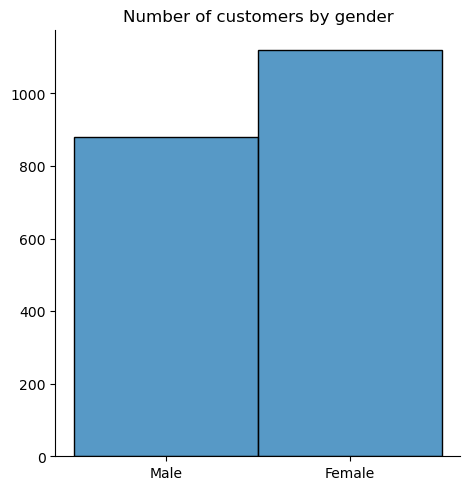

In [18]:
# Number of customers by gender

print(f"Number of customers by: {reviews['gender'].value_counts()}")

sns.displot(data=reviews['gender'], kde=False)
plt.title('Number of customers by gender')
plt.xlabel('')
plt.ylabel('')

Number of customers by: age_bin
30-40    750
20-30    390
40-50    360
50-60    180
60-70    170
15-20    120
70+       30
Name: count, dtype: int64


Text(0, 0.5, '')

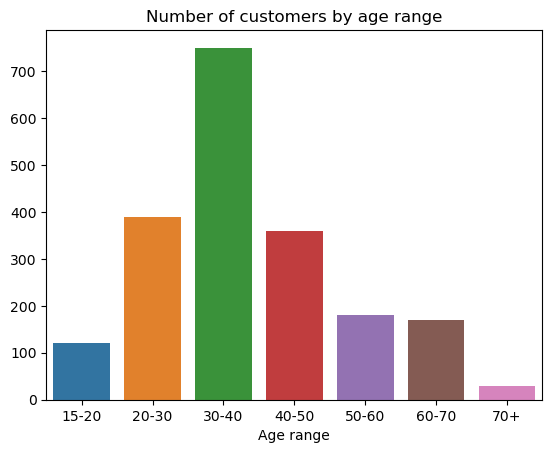

In [19]:
# Number of customers by age bin

print(f"Number of customers by: {reviews['age_bin'].value_counts()}")

ax = sns.countplot(x = 'age_bin', data = reviews)
plt.title('Number of customers by age range')
plt.xlabel('Age range')
plt.ylabel('')

Number of customers by: income_bin
£40-60k     598
£20-40k     505
£60-80k     383
£0-£20k     295
£80-100k    179
£100k+       40
Name: count, dtype: int64


Text(0, 0.5, '')

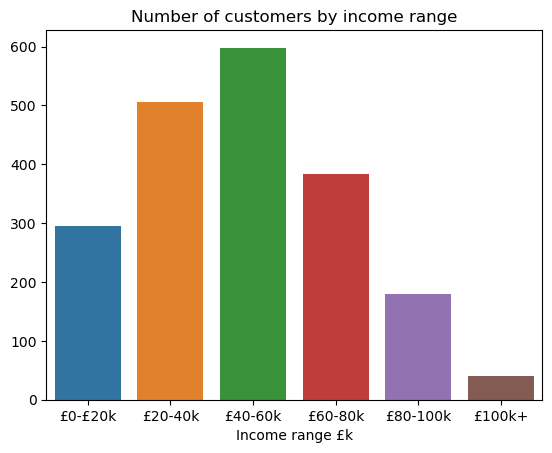

In [20]:
# Number of customers by income

print(f"Number of customers by: {reviews['income_bin'].value_counts()}")

ax = sns.countplot(x = 'income_bin', data = reviews)
plt.title('Number of customers by income range')
plt.xlabel('Income range £k')
plt.ylabel('')

Number of customers by: loyalty_points_bin
1k-2k    911
0-1k     686
3k-4k    173
2k-3k     85
4k-5k     84
5k-6k     49
6k-7k     12
Name: count, dtype: int64


Text(0, 0.5, '')

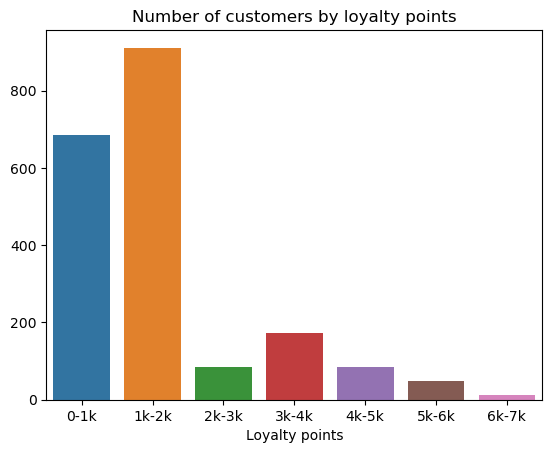

In [21]:
# Number of customers by loyalty points range

print(f"Number of customers by: {reviews['loyalty_points_bin'].value_counts()}")

ax = sns.countplot(x = 'loyalty_points_bin', data = reviews)
plt.title('Number of customers by loyalty points')
plt.xlabel('Loyalty points')
plt.ylabel('')

Number of customers by: spend_score_bin
40-60    718
0-20     378
60-80    330
80+      303
20-40    271
Name: count, dtype: int64


Text(0, 0.5, '')

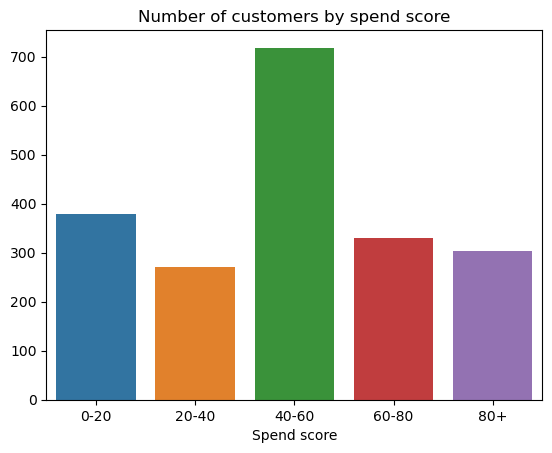

In [22]:
# Number of customers by spend score

print(f"Number of customers by: {reviews['spend_score_bin'].value_counts()}")

ax = sns.countplot(x = 'spend_score_bin', data = reviews)
plt.title('Number of customers by spend score')
plt.xlabel('Spend score')
plt.ylabel('')

In [23]:
# Number of customers by gender and age

pivot = reviews.pivot_table(index = 'age_bin', columns = ['gender'], values = 'age', aggfunc='count')
pivot

gender   Female  Male
age_bin              
15-20        30    90
20-30       250   140
30-40       440   310
40-50       240   120
50-60        80   100
60-70        80    90
70+           0    30

Text(0, 0.5, '')

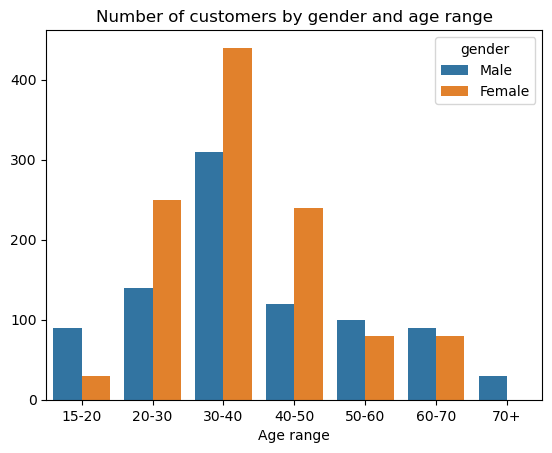

In [24]:
# Number of customers by gender and age

ax = sns.countplot(x = 'age_bin', hue = 'gender', data = reviews)
plt.title('Number of customers by gender and age range')
plt.xlabel('Age range')
plt.ylabel('')

In [25]:
# Average income by age and gender

pivot = reviews.pivot_table(index = 'age_bin', columns = ['gender'], values = 'income_£k', aggfunc='mean')
pivot

gender      Female       Male
age_bin                      
15-20    48.516667  43.505556
20-30    39.763440  40.414286
30-40    51.706591  58.397226
40-50    47.249083  53.436667
50-60    49.333250  43.033600
60-70    44.157000  40.125333
70+            NaN  39.606000

Text(0, 0.5, '')

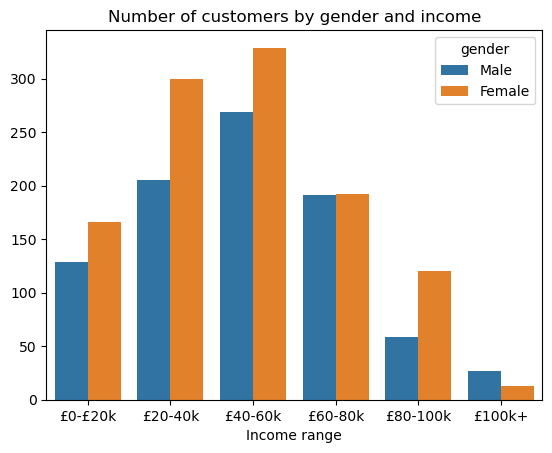

In [26]:
# Number of customers by gender and income

ax = sns.countplot(x = 'income_bin', hue = 'gender', data = reviews)
plt.title('Number of customers by gender and income')
plt.xlabel('Income range')
plt.ylabel('')

In [27]:
# Number of customers by gender and spend score

pivot = reviews.pivot_table(index = 'spend_score_bin', columns = ['gender'], values = 'spend_score', aggfunc='count')
pivot

gender           Female  Male
spend_score_bin              
0-20                170   208
20-40               189    82
40-60               406   312
60-80               191   139
80+                 164   139

Text(0, 0.5, '')

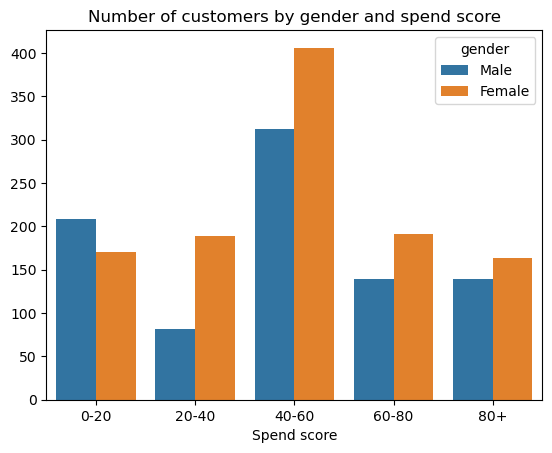

In [28]:
# Number of customers by gender and spend score

ax = sns.countplot(x = 'spend_score_bin', hue = 'gender', data = reviews)
plt.title('Number of customers by gender and spend score')
plt.xlabel('Spend score')
plt.ylabel('')

In [29]:
# Number of customers by gender and loyalty points

pivot = reviews.pivot_table(index = 'loyalty_points_bin', columns = ['gender'], values = 'loyalty_points', aggfunc='count')
pivot

gender              Female  Male
loyalty_points_bin              
0-1k                   349   337
1k-2k                  537   374
2k-3k                   59    26
3k-4k                   85    88
4k-5k                   57    27
5k-6k                   30    19
6k-7k                    3     9

Text(0, 0.5, '')

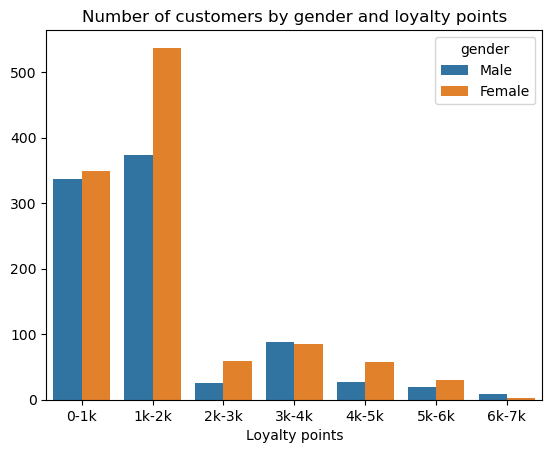

In [30]:
# Number of customers by gender and loyalty points

ax = sns.countplot(x = 'loyalty_points_bin', hue = 'gender', data = reviews)
plt.title('Number of customers by gender and loyalty points')
plt.xlabel('Loyalty points')
plt.ylabel('')

In [31]:
# Number of customers by education and age group

pivot = reviews.pivot_table(index = 'age_bin', columns = ['education'], values = 'age', aggfunc='count')
pivot

education  Basic  PhD  diploma  graduate  postgraduate
age_bin                                               
15-20          0   30        0        70            20
20-30          0   70        0       230            90
30-40         20  190       70       330           140
40-50         30   70       50       150            60
50-60          0   30       40        70            40
60-70          0   50       30        50            40
70+            0   20        0         0            10

##### Observations
ABOUT THE CUSTOMERS
- GENDER: 56% of customers are female (1120).
- AGE: The majority (750 or 37.5%) of customers are aged 30 to 40 years old.
- AVERAGE INCOME: The highest average income is for those aged 30-40 is: £51.7k (female) and £58.4k (male).
- INCOME: Looking at distribution, most of the customers are female earning £40-60k, followed by females earning £20-40k.
- SPEND SCORE: 36% of customers have a spend score between 40-60, while the other ranges are considerably lower but fairly equally distributed.
- LOYALTY POINTS: 80% of customers have between 0 to 2000 loyalty points, with 46% having 1000 to 2000.
- EDUCATION: There appears to be some unusual values for education. I would not expect anyone under 20 would have a degree (gradate, postgraduate or PhD) and that this age group would have 0 in Basic education. I'm going to overwrite the values to Basic.

In [32]:
# Replace education to Basic if age is less than 20

reviews['education'] = reviews['education'].where(reviews['age'] > 20, 'Basic')

# Check change made
pivot = reviews.pivot_table(index = 'age_bin', columns = ['education'], values = 'age', aggfunc='count')
pivot

education  Basic  PhD  diploma  graduate  postgraduate
age_bin                                               
15-20        120    0        0         0             0
20-30          0   70        0       230            90
30-40         20  190       70       330           140
40-50         30   70       50       150            60
50-60          0   30       40        70            40
60-70          0   50       30        50            40
70+            0   20        0         0            10

In [33]:
# Save updated dataframe as csv file (now that education column updated)

reviews.to_csv('turtle_reviews_clean_2.csv', index = False)

Text(0, 0.5, '')

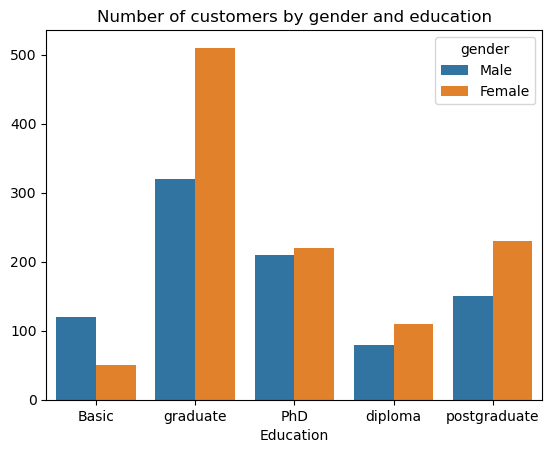

In [34]:
# Number of customers by gender and education

ax = sns.countplot(x = 'education', hue = 'gender', data = reviews)
plt.title('Number of customers by gender and education')
plt.xlabel('Education')
plt.ylabel('')

In [35]:
# Average loyalty points

reviews['loyalty_points'].mean()

1578.032

In [36]:
# Average loyalty points by gender

pivot = reviews.pivot_table(columns = ['gender'], values = 'loyalty_points', aggfunc='mean')
pivot

gender               Female       Male
loyalty_points  1601.166964  1548.5875

In [37]:
# Average loyalty points by age

pivot = reviews.pivot_table(columns = ['age_bin'], values = 'loyalty_points', aggfunc='mean')
pivot

age_bin              15-20        20-30        30-40        40-50  \
loyalty_points  889.783333  1264.666667  2133.878667  1378.344444   

age_bin               50-60        60-70          70+  
loyalty_points  1177.516667  1246.517647  1186.533333

In [38]:
# Average loyalty points by income

pivot = reviews.pivot_table(columns = ['income_bin'], values = 'loyalty_points', aggfunc='mean')
pivot

income_bin        £0-£20k     £20-40k      £40-60k      £60-80k     £80-100k  \
loyalty_points  509.99661  982.409901  1623.792642  2291.788512  2877.357542   

income_bin      £100k+  
loyalty_points  3641.7

In [39]:
# Average loyalty points by spend score

pivot = reviews.pivot_table(columns = ['spend_score_bin'], values = 'loyalty_points', aggfunc='mean')
pivot

spend_score_bin        0-20       20-40        40-60        60-80          80+
loyalty_points   424.775132  1024.03321  1429.993036  2175.551515  3212.273927

In [40]:
# Average loyalty points by education

pivot = reviews.pivot_table(columns = ['education'], values = 'loyalty_points', aggfunc='mean')
pivot

education             Basic          PhD      diploma     graduate  \
loyalty_points  1294.270588  1539.504651  1336.021053  1733.766265   

education       postgraduate  
loyalty_points   1529.423684

In [41]:
# Average loyalty points by gender and age

pivot = reviews.pivot_table(index = 'age_bin', columns = ['gender'], values = 'loyalty_points', aggfunc='mean')
pivot

gender        Female         Male
age_bin                          
15-20    1102.766667   818.788889
20-30    1328.644000  1150.421429
30-40    2031.154545  2279.680645
40-50    1350.141667  1434.750000
50-60    1224.112500  1140.240000
60-70    1404.900000  1105.733333
70+              NaN  1186.533333

In [42]:
# Average loyalty points and spend score by age and gender

pivot = reviews.pivot_table(index = 'age_bin', columns = ['gender'], 
                           values = ['loyalty_points', 'spend_score'], aggfunc='mean')
pivot

loyalty_points              spend_score           
gender          Female         Male      Female       Male
age_bin                                                   
15-20      1102.766667   818.788889   53.366667  48.200000
20-30      1328.644000  1150.421429   57.712000  55.657143
30-40      2031.154545  2279.680645   56.038636  57.570968
40-50      1350.141667  1434.750000   40.179167  37.341667
50-60      1224.112500  1140.240000   33.875000  37.950000
60-70      1404.900000  1105.733333   46.687500  38.488889
70+                NaN  1186.533333         NaN  50.300000

In [43]:
# Maximum loyalty points

reviews['loyalty_points'].max()

6847

In [44]:
# Maximum loyalty points by gender

pivot = reviews.pivot_table(columns = ['gender'], values = 'loyalty_points', aggfunc='max')
pivot

gender          Female  Male
loyalty_points    6847  6208

In [45]:
# Maximum loyalty points by age

pivot = reviews.pivot_table(columns = ['age_bin'], values = 'loyalty_points', aggfunc='max')
pivot

age_bin         15-20  20-30  30-40  40-50  50-60  60-70   70+
loyalty_points   3850   4814   6208   6847   6232   6020  3695

In [46]:
# Maximum loyalty points by income

pivot = reviews.pivot_table(columns = ['income_bin'], values = 'loyalty_points', aggfunc='max')
pivot

income_bin      £0-£20k  £20-40k  £40-60k  £60-80k  £80-100k  £100k+
loyalty_points     1292     1851     3866     5059      6232    6847

In [47]:
# Maximum loyalty points by spend score

pivot = reviews.pivot_table(columns = ['spend_score_bin'], values = 'loyalty_points', aggfunc='max')
pivot

spend_score_bin  0-20  20-40  40-60  60-80   80+
loyalty_points   1414   2325   2332   5669  6847

In [48]:
# Maximum loyalty points by education

pivot = reviews.pivot_table(columns = ['education'], values = 'loyalty_points', aggfunc='max')
pivot

education       Basic   PhD  diploma  graduate  postgraduate
loyalty_points   4837  6020     6847      6208          6232

Text(0, 0.5, '')

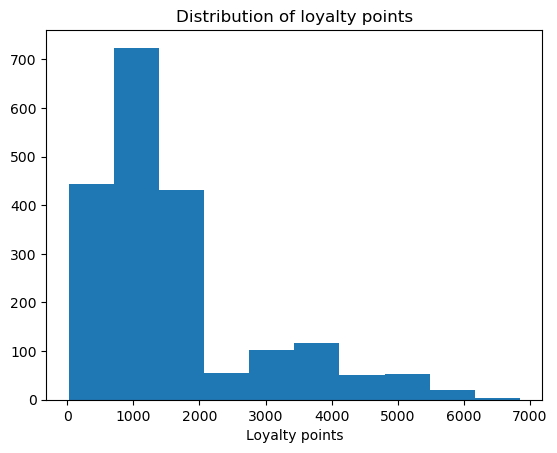

In [49]:
# Distribution of loyalty points

fig, ax = plt.subplots()
ax.hist(reviews['loyalty_points'])
plt.title('Distribution of loyalty points')
plt.xlabel('Loyalty points')
plt.ylabel('')

Text(0, 0.5, 'Loyalty points')

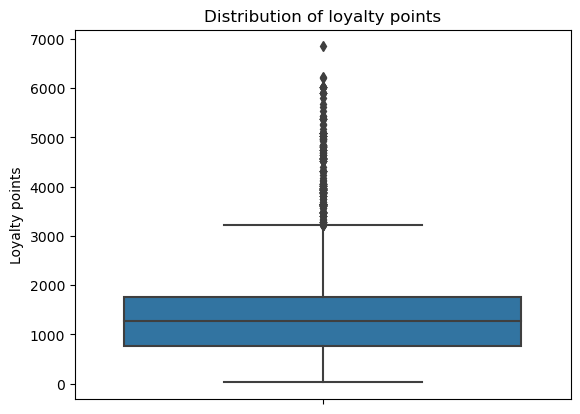

In [50]:
# Distribution of loyalty points

sns.boxplot(y = 'loyalty_points', data = reviews)
plt.title('Distribution of loyalty points')
plt.xlabel('')
plt.ylabel('Loyalty points')

Text(0, 0.5, 'Loyalty points')

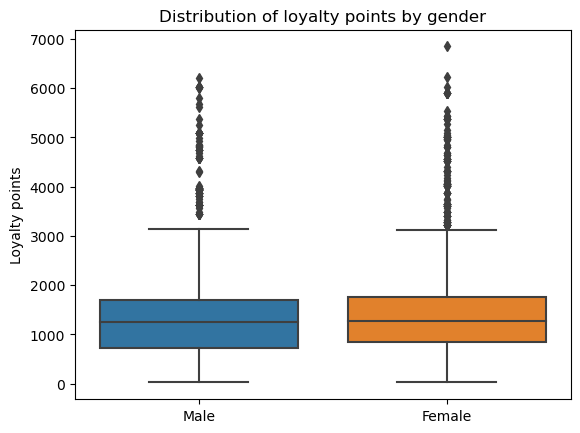

In [51]:
# Relationship between loyalty points and gender

sns.boxplot(x = 'gender', y = 'loyalty_points', data = reviews)
plt.title('Distribution of loyalty points by gender')
plt.xlabel('')
plt.ylabel('Loyalty points')

Text(0, 0.5, 'Loyalty points')

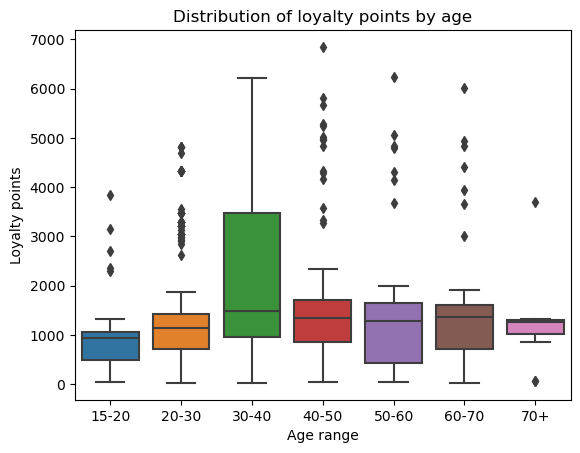

In [52]:
# Relationship between loyalty points and age

sns.boxplot(x = 'age_bin', y = 'loyalty_points', data = reviews)
plt.title('Distribution of loyalty points by age')
plt.xlabel('Age range')
plt.ylabel('Loyalty points')

Text(0, 0.5, 'Loyalty points')

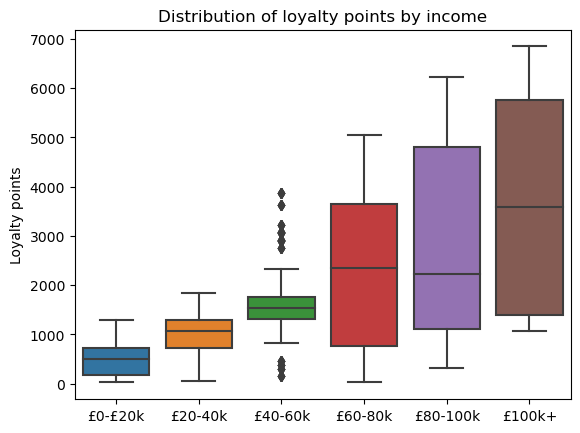

In [53]:
# Relationship between loyalty points and income

sns.boxplot(x = 'income_bin', y = 'loyalty_points', data = reviews)
plt.title('Distribution of loyalty points by income')
plt.xlabel('')
plt.ylabel('Loyalty points')

Text(0, 0.5, 'Loyalty points')

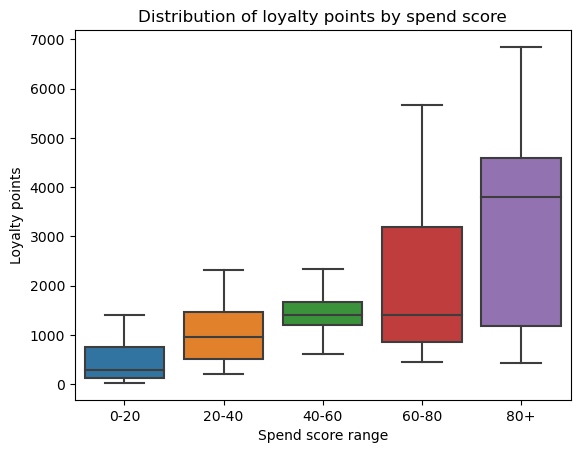

In [54]:
# Relationship between loyalty points and spend score

sns.boxplot(x = 'spend_score_bin', y = 'loyalty_points', data = reviews)
plt.title('Distribution of loyalty points by spend score')
plt.xlabel('Spend score range')
plt.ylabel('Loyalty points')

Text(0, 0.5, 'Loyalty points')

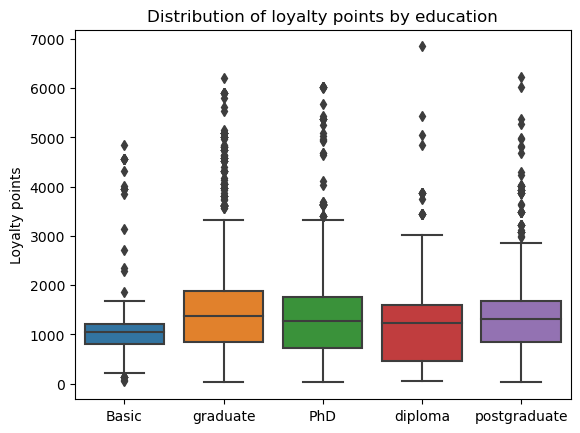

In [55]:
# Relationship between loyalty points and education

sns.boxplot(x = 'education', y = 'loyalty_points', data = reviews)
plt.title('Distribution of loyalty points by education')
plt.xlabel('')
plt.ylabel('Loyalty points')

##### Observations

EDUCATION
- Most of the customers have above basic education level, in particular graduate degree.

AVERAGE LOYALTY POINTS
- The mean loyalty points across the full data set is 1578, and the values are similar regardless of gender (female = 1601, male 1548).
- People aged 30-40 have above average number of loyaty points (2133.9) and again the values are similar for males and females.
- All other age groups have average loyalty points (except 15-20 which are below average at 890).

MAXIMUM LOYALTY POINTS
- Maximum number of points goes to females aged 40-50 with 6847 points.
- Age seems to be related to loyalty points since customers aged between 30 to 70 have the highest maximum loyalty points.
- As expected customers with lower spend scores (less than 60) and income less than £60k have much lower maximum loyalty points.

DISTRIBUTION
- Most data points lie in and around 1000 points.
- The data is left skewed.
- The distribution of loyalty points is very similar for males and females.
- The relationship between gender and loyalty points is pretty similar. 
- This is a different story with regard to age, where customers between 30-40 years old have the broadest range of loyalty points.

# Predictive analytics: Linear regression

In [56]:
# Determine correlation of columns with numeric values (and to get columns suitable for regression)

reviews.corr(numeric_only = True)

age  income_£k  spend_score  loyalty_points   product
age             1.000000  -0.005708    -0.224334       -0.042445  0.003081
income_£k      -0.005708   1.000000     0.005612        0.616065  0.305309
spend_score    -0.224334   0.005612     1.000000        0.672310 -0.001649
loyalty_points -0.042445   0.616065     0.672310        1.000000  0.183600
product         0.003081   0.305309    -0.001649        0.183600  1.000000

##### Observations
CORRELATION
- Both income and spend_score have over 60% correlation indicating a strong positive linear relationship.
- The correlation between age and loyalty points is 0.04 indicating no linear relationship.
- Product values are product codes and the the correlation value is very small so we won't use it.

Coefficients: [  -4.01280515 1736.5177394 ]

Correlation between loyalty_points and age: -0.04



(<function matplotlib.pyplot.show(close=None, block=None)>, None, None)

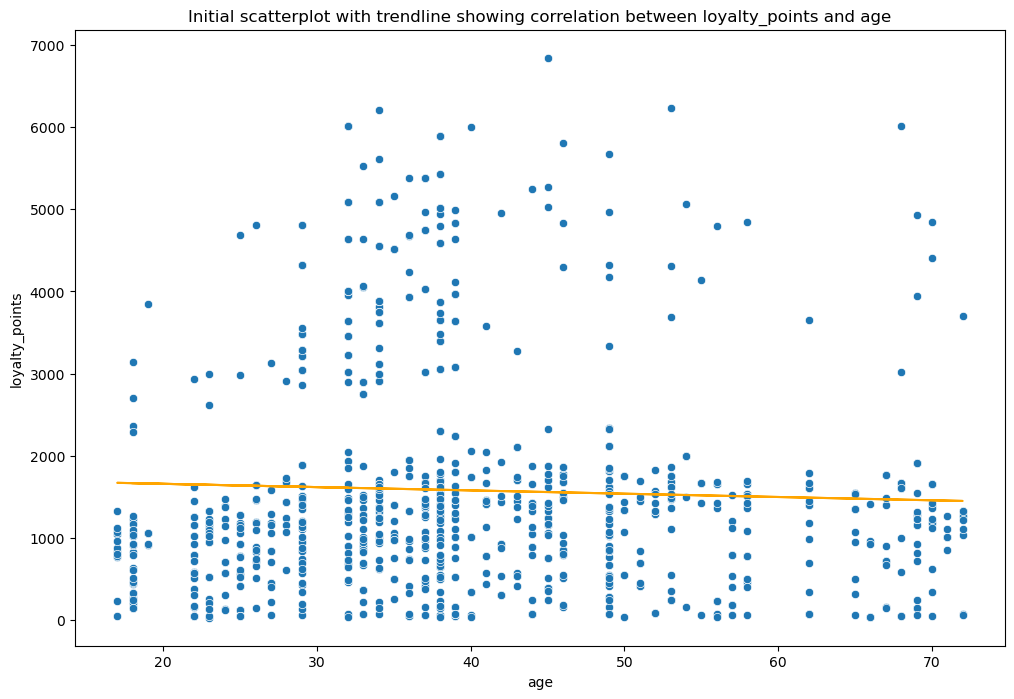

In [57]:
# Use function to fit linear regression and plot initial scatterplot
# function = slr_correlation_plot(df, dependent, independent)
# ols_model = fitted model

slr_correlation_plot(reviews, 'loyalty_points', 'age')

##### Observations
INITIAL SCATTERPLOT: AGE
- The plot shows that there is no relationship between age and the number of loyalty points a customer has.
- This is a bit surprising because of how we saw earlier that customers aged 30-40 had the highest average loyalty points and stood out.

Coefficients: [ 34.18782549 -65.6865128 ]

Correlation between loyalty_points and income_£k: 0.62



(<function matplotlib.pyplot.show(close=None, block=None)>, None, None)

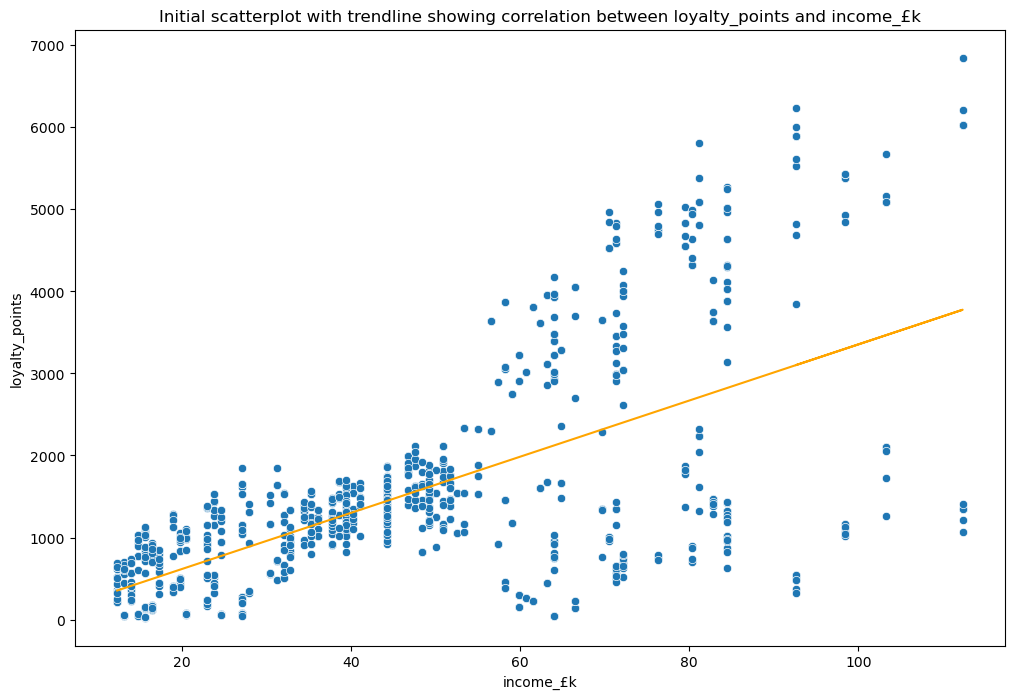

In [58]:
# Use function to fit linear regression and plot initial scatterplot
# function = slr_correlation_plot(df, dependent, independent)

slr_correlation_plot(reviews, 'loyalty_points', 'income_£k')

##### Observations
INITIAL SCATTERPLOT: INCOME
- As income increases loyalty points increases, however, as income increases the spread of the number of loyalty points increases significantly. 
- Looking at this chart, the model is a good fit for incomes less than £60k, and loyalty points less than 3000.
- It may be harder to predict loyalty points for higher values.

Coefficients: [ 33.06169326 -75.05266293]

Correlation between loyalty_points and spend_score: 0.67



(<function matplotlib.pyplot.show(close=None, block=None)>, None, None)

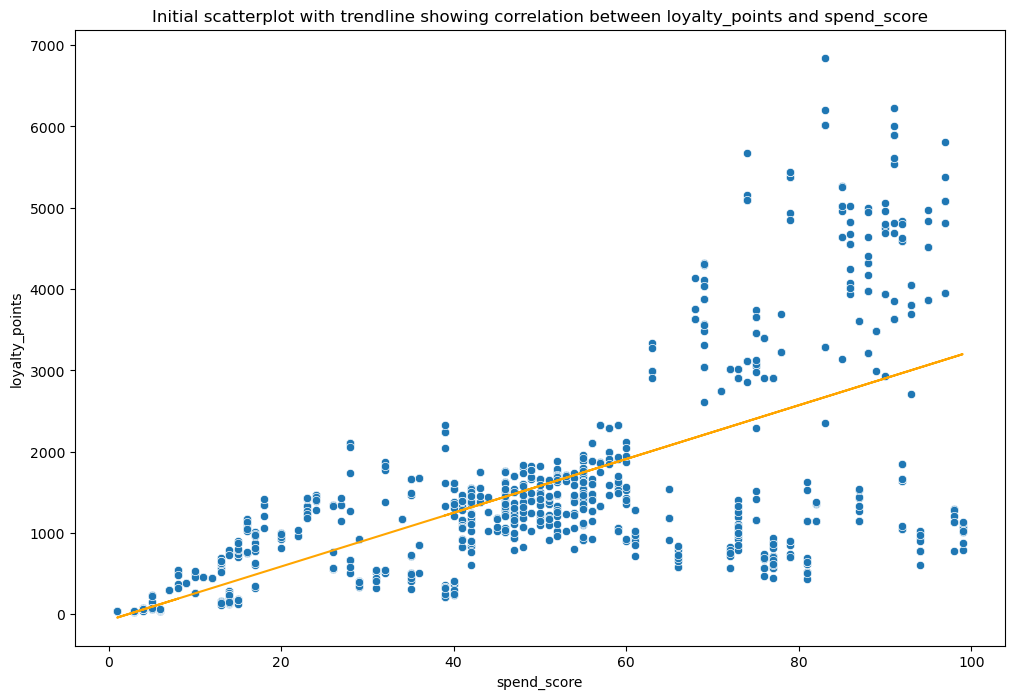

In [59]:
# Use function to fit linear regression and plot initial scatterplot
# function = slr_correlation_plot(df, dependent, independent)

slr_correlation_plot(reviews, 'loyalty_points', 'spend_score')

##### Observations
INITIAL SCATTERPLOT: SPEND SCORE
- As spend score increases loyalty points increases too.
- However, the data points become more varied (higher and lower) as the spend score and loyalty points increases, meaning it may be harder to predict high values.

In [60]:
# Use function to create OLS regression summary table and predicted values
# ols_summary(df, dependent, independent)

ols_summary(reviews, 'loyalty_points', 'age')

INDEPENDENT VARIABLE: age                             OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 07 Jul 2024   Prob (F-statistic):             0.0577
Time:                        17:40:42   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     

##### Observations
OLS REGRESSION RESULTS FOR AGE

- R-squared: Because the value is so low (0.002 which is less than 1%) age is not a strong predictor of loyalty points.
- F-statistic (prob): This value is low (0.0577) indicating the model is not a strong fit.
- P-value: Age is not significant.
- Skew: A skew value of 1.449 indicates moderate skewness with more values are concentrated on the left (lower age range).

In [61]:
# Use function to create OLS regression summary table and predicted values
# ols_summary(df, dependent, independent)

ols_summary(reviews, 'loyalty_points', 'income_£k')

INDEPENDENT VARIABLE: income_£k                             OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          2.43e-209
Time:                        17:40:42   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.686

##### Observations
OLS REGRESSION RESULTS FOR INCOME

- R-squared: Income is a moderate predictor of loyalty points based on a R-squared value of 0.379.
- F-statistic (prob): This value is very high (1222) indicating the model is a strong fit.
- P-value: Tells us if the coefficient is significant. Since this is 0 it indicates that income is significant.
- Skew: A skew value of 0.089 indicates the data has a nearly symmetric distribution.
- Coeff: This means when income increases by £1000, loyalty points increases by 34.

In [62]:
# Use function to create OLS regression summary table and predicted values
# ols_summary(df, dependent, independent)

ols_summary(reviews, 'loyalty_points', 'spend_score')

INDEPENDENT VARIABLE: spend_score                             OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          2.92e-263
Time:                        17:40:42   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -7

##### Observations
OLS REGRESSION RESULTS FOR SPEND SCORE

- R-squared: An R-squared value of 0.452 means 45.2% of the loyalty points variable is explained by the spend score variable.
- F-statistic (prob): This value is very high (1648) indicating the model is a strong fit.
- P-value: This is 0 which tells us that spend score is significant at explaining loyalty points.
- Skew: A skew value of 0.422 indicates moderate skewness with more values are concentrated on the left.
- Coeff: This means when spend score increases by 1 unit, loyalty points increases by 33.

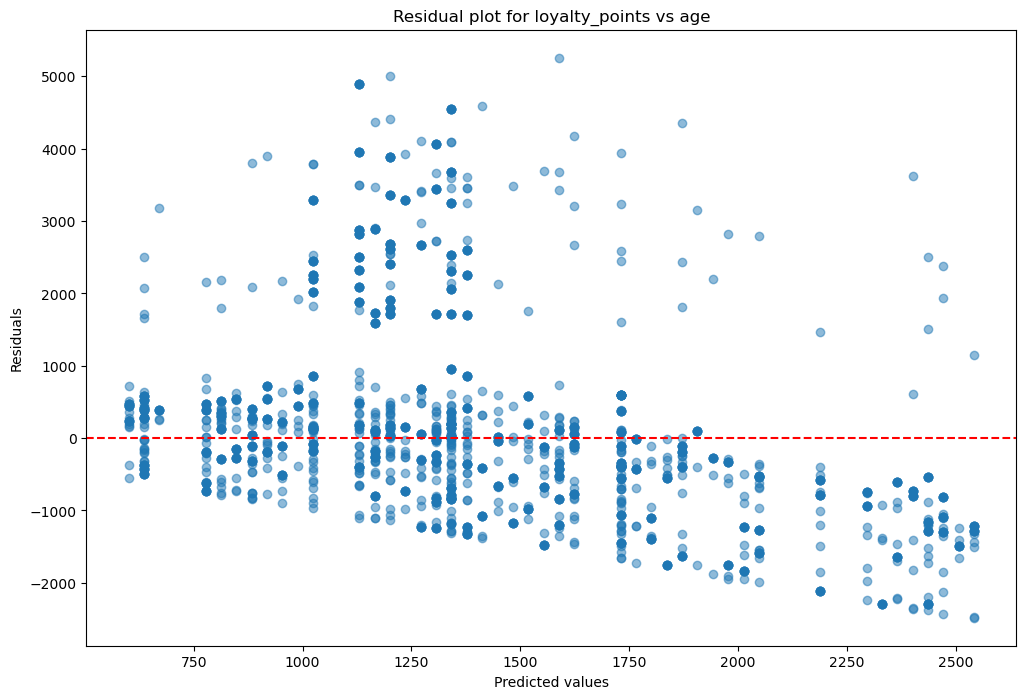

In [63]:
# Use function to create residual plot
# residual_plot(df, dependent, independent)

residual_plot(reviews, 'loyalty_points', 'age')

##### Observations
RESIDUAL PLOT: AGE
- In the case of age, the points do not appear to be randomly distributed; there is a downward straight line pattern.

- And there are quite a few outliers, which are data points with large residuals.

- The results of this graph correspond to the plots and tests we've run previously where age is not a good predictor of loyalty points.
- With this in mind, we will exlude this from future regression analysis.

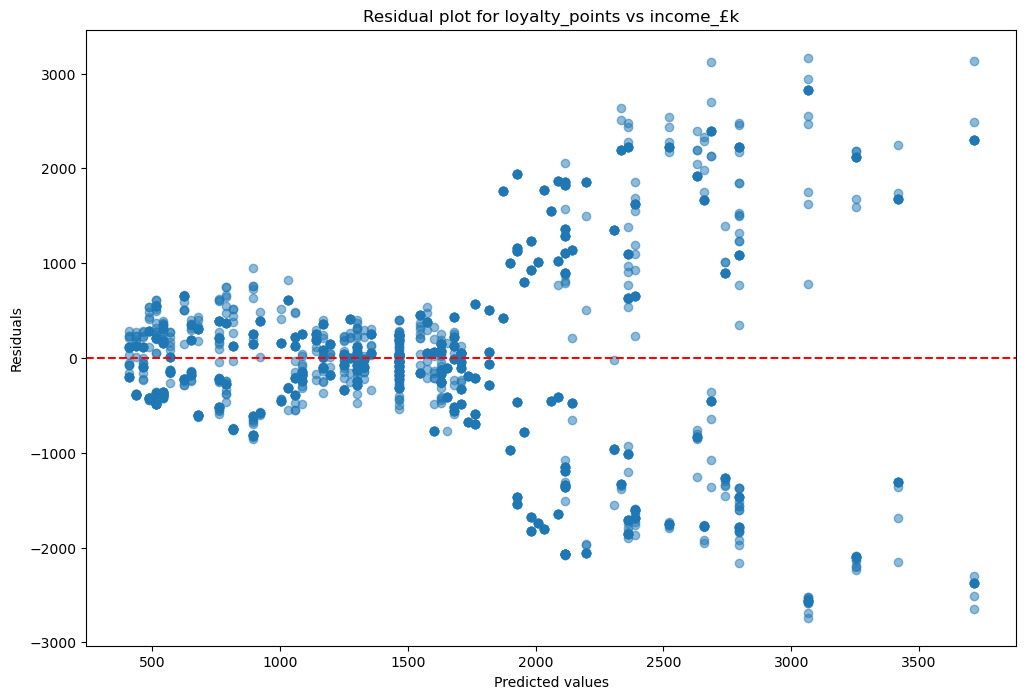

In [64]:
# Use function to create residual plot
# residual_plot(df, dependent, independent)

residual_plot(reviews, 'loyalty_points', 'income_£k')

##### Observations
RESIDUAL PLOT: INCOME
- For lower loyalty points, income is a good predictor because the points are random and close to the red line.
- This is not true for higher values (above 2000 predicted) as we've seen with the previous scatterplot showing the correlation between loyalty points and income. 
- This plot exhibit heteroscedasticity: the residuals get larger as the prediction moves from small to large (or from large to small.
- This is most likely occurring because our dataset is relatively small (2000) and has a large range between the largest and smallest observed values.
- To improve this we'll add another variable and conduct multiple regression.

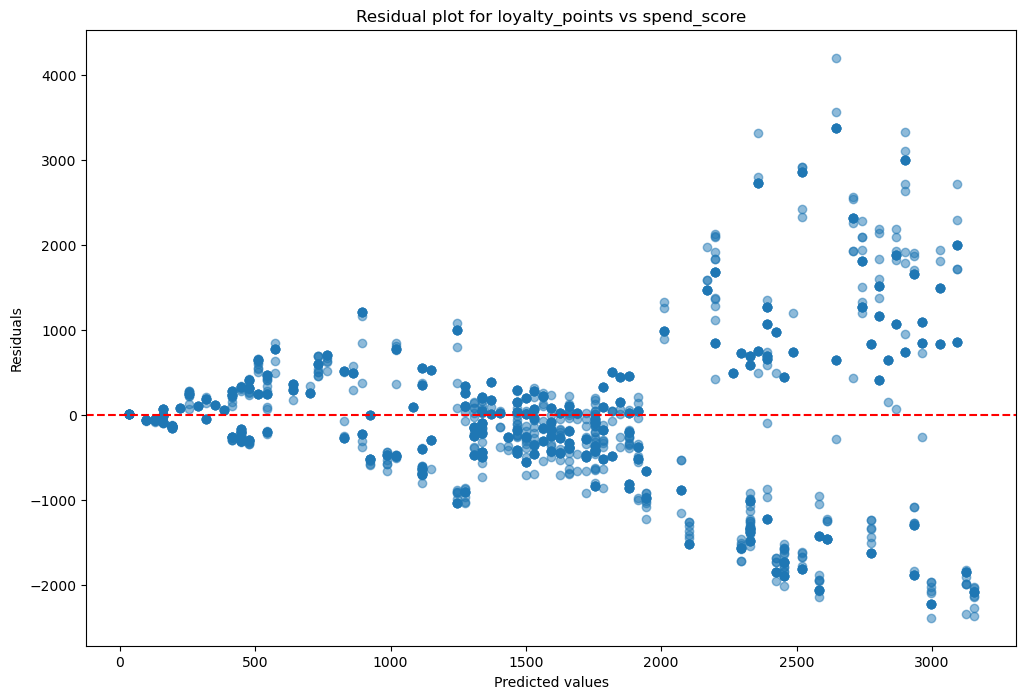

In [65]:
# Use function to create residual plot
# residual_plot(df, dependent, independent)

residual_plot(reviews, 'loyalty_points', 'spend_score')

##### Observations
RESIDUAL PLOT: SPEND SCORE
- Similar to income, this residual plot shows that the model is fairly good at predicting values when values are lower, however, it's displaying heteroscedasticity as the values increase. 
- Again we see a lot of outliers from 2000 predicted values, which are quite a distance from 0 indicating that these are not very accurate predictions.

## Linear regression: shape data, splitting it split into train and test

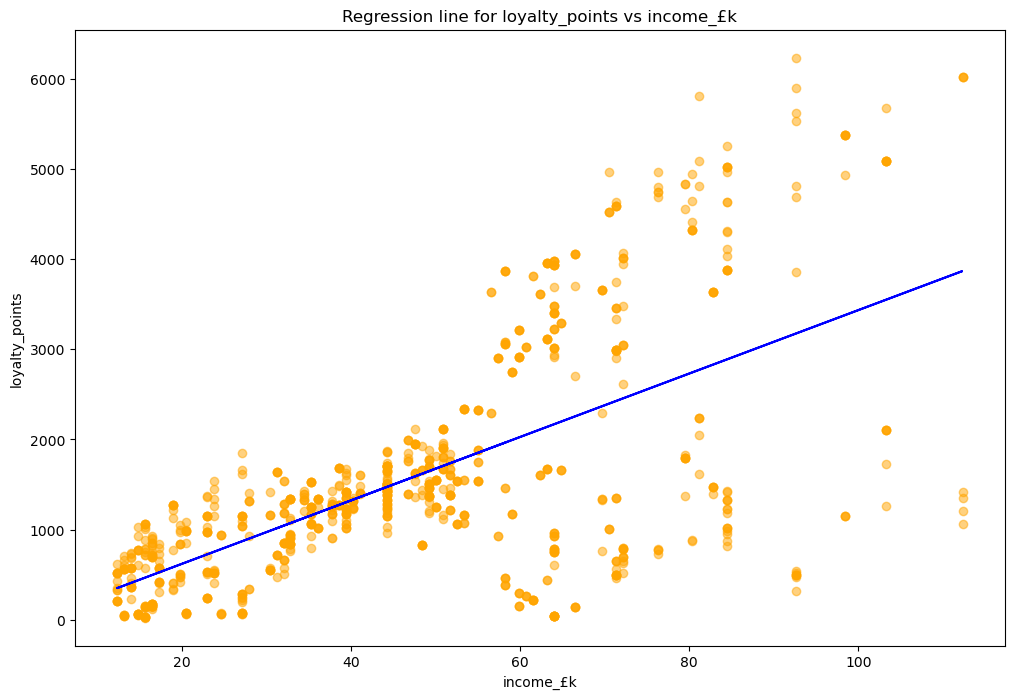

In [66]:
# Use function to do simple linear regression
# slr(df, dependent, independent)

slr(reviews, 'loyalty_points', 'income_£k')

##### Observations
REGRESSION PLOT: INCOME
- This regression plot was created using Numpy polyfit model and a 50/50 split of the data (because the data set is quite small).
- This graphs shows that there is a positive relationship between income and loyalty points. So as income increases, loyalty points increase.
- However, as we expected when looking at the initial descriptive statistics, the model performs less accurately as values increase.
- We can see the distance of the data points to the regression line also increases as income increases.

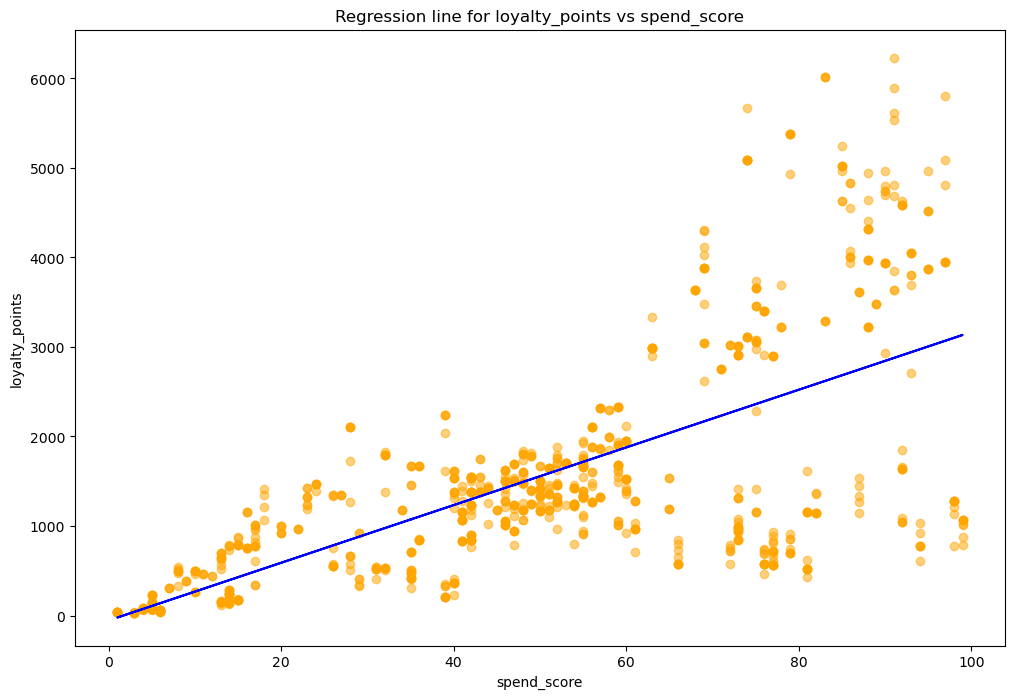

In [67]:
# Use function to do simple linear regression
# slr(df, dependent, independent)

slr(reviews, 'loyalty_points', 'spend_score')

##### Observations
REGRESSION PLOT: SPEND SCORE
- This regression plot was created using Numpy polyfit model and a 50/50 split of the data set.
- As with income, this graphs shows that there is a positive relationship between spend score and loyalty points.
- Like with income, the distance of the data points to the regression line increases (though not as much) indicating that again this model is less accurate as spend score is more than 70.
- As mentioned earlier it's displaying heteroscedasticity and we'll conduct multiple regression and add another variable to see if the model improves.

In [68]:
# Use function to predict values based on income
# slr_predict(df, dependent, independent)

# Predict number of loyalty points based on income

slr_predict(reviews, 'loyalty_points', 'income_£k')


R-squared value: 0.35


Intercept value: [-80.33891339]


Coefficient value: [[35.13370968]]

Prediction based on income_£k:
 [[ 783.95034476]
 [2166.81315779]
 [1993.95530616]
 [1705.85888678]
 [1590.62031903]
 [1360.14318352]
 [2051.57459004]
 [ 611.09249313]
 [1302.52389964]
 [1907.52638035]
 [1187.28533189]
 [1648.2396029 ]
 [1849.90709647]
 [2771.8156385 ]
 [2454.90957717]
 [1475.38175127]
 [2138.00351585]
 [1965.14566422]
 [ 582.28285119]
 [ 639.90213506]
 [1475.38175127]
 [ 899.18891251]
 [2887.05420625]
 [1475.38175127]
 [1244.90461577]
 [1677.04924484]
 [2598.95778687]
 [2368.48065136]
 [3175.15062563]
 [ 755.14070282]
 [ 755.14070282]
 [2138.00351585]
 [2426.09993524]
 [1734.66852872]
 [1475.38175127]
 [1129.66604801]
 [1158.47568995]
 [1619.42996096]
 [1475.38175127]
 [1158.47568995]
 [1936.33602229]
 [1302.52389964]
 [1129.66604801]
 [2771.8156385 ]
 [3376.8181192 ]
 [ 726.33106088]
 [1734.66852872]
 [1590.62031903]
 [1331.33354158]
 [1158.47568995]
 [2743.00599656]
 [1072

(None, None, None, None)

##### Observations
PREDICTED VALUES: INCOME
- The coefficient value indicates that as income increases, loyalty points increases by 35. 
- But since the r-squared for income is weak, it only explains 35% of the of changes in loyalty points.
- This weak score is likely due to the fact that we observed heteroscedasticity as income increased, the values were further away from the regression line.
- We expected this when initially looking at the descriptive statistics (high standard deviation and wide spread of data).
- Looking at this information and the previous plots, I feel this the model is ok for income less than £60k and loyalty points less than 3000. Values higher than this are too spread out and less accurate.

In [69]:
# Use function to predict values based on income
# slr_predict(df, dependent, independent)

# Predict number of loyalty points based on spend score

slr_predict(reviews, 'loyalty_points', 'spend_score')


R-squared value: 0.47


Intercept value: [-54.8347049]


Coefficient value: [[32.21189661]]

Prediction based on spend_score:
 [[  74.01288156]
 [2393.26943778]
 [2232.20995471]
 [1298.0649529 ]
 [1426.91253935]
 [1749.0315055 ]
 [ 267.28426124]
 [2296.63374794]
 [1845.66719534]
 [2876.44788699]
 [1555.76012581]
 [1523.5482292 ]
 [1330.27684951]
 [1201.42926305]
 [ 363.91995109]
 [1684.60771227]
 [1104.79357321]
 [ 299.49615786]
 [ 879.31029691]
 [ 106.22477817]
 [1459.12443597]
 [ 492.76753754]
 [ 492.76753754]
 [1362.48874613]
 [1749.0315055 ]
 [1523.5482292 ]
 [2844.23599038]
 [ 782.67460707]
 [ 202.86046802]
 [2747.60030053]
 [ 943.73409014]
 [ 331.70805447]
 [ 267.28426124]
 [1426.91253935]
 [1587.97202242]
 [1620.18391904]
 [1394.70064274]
 [1716.81960888]
 [1620.18391904]
 [1394.70064274]
 [ 879.31029691]
 [1845.66719534]
 [1877.87909195]
 [3069.71926667]
 [2489.90512762]
 [ 396.1318477 ]
 [1426.91253935]
 [1426.91253935]
 [1716.81960888]
 [1877.87909195]
 [ 428.34374432]
 [145

(None, None, None, None)

##### Observations
PREDICTED VALUES: SPEND SCORE
- Looking at the R-squared value of 0.47, this model is a bit better than income.
- This low value could be due to the heteroscedasticity we observed in the plots.
- However, adding both income and spend score to our regression may create a better model.

### Multiple linear regression

In [70]:
# Create a multiple linear regression model using income and spend score

y = reviews['loyalty_points']
X = reviews[['spend_score', 'income_£k']]

mlr = linear_model.LinearRegression()
mlr.fit(X, y)

print('Results for multiple linear regression using spend_score and income')
print(f"\nR-squared value: ", round(mlr.score(X, y), 3))
print(f"\nIntercept value: ", mlr.intercept_)
print(f"\nCoefficient values: ", list(zip(X, mlr.coef_)))

Results for multiple linear regression using spend_score and income

R-squared value:  0.827

Intercept value:  -1700.3050970144384

Coefficient values:  [('spend_score', 32.892694687821), ('income_£k', 33.97949882180285)]


##### Observations
MULTIPLE LINEAR REGRESSION
- Using multiple linear regression improved the model, the r-squared increased significantly.
- The multiple linear regression model now predicts 82.7% of the dependent variable.

In [71]:
# Get OLS summary results

mlr = ols('y ~ X', data = reviews).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:40:43   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1700.3051     35.740    -47.575      0.000   -1770.396   -1630.214
X[0]          32.8927      0.458     71.845      0.000      31.995      33.791
X[1]          33.9795      0.517     65.769      0.000      32.966      34.993
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   3.477
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.650
Skew:                           0.103   Prob(JB):                       0.0978
Kurtosis:                       3.115   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observations
OLS RESULTS: MULTIPLE LINEAR REGRESSION
- The R-squared and adjusted r-squared are the same (82.7%).
- The probability of the F-statistic is 0 so this multiple linear regression model is significant.
- The p-values for both spend score and income are 0, meaning they are both significant.
- The coefficient values indicate that for every unit increase in spend score, loyalty points increases by 33. And for every £1k increase in income, loyalty points will increase by 34.

In [72]:
# Run multiple linear regression on train subset

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Run regression on train subset
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Predict on test set
y_pred_test = mlr.predict(x_test)
y_pred_test

array([ -695.01464031,  2959.64601421,  2630.05225962,  1423.32872798,
        1436.8707415 ,  1527.57418213,   746.50855134,  1329.30990871,
        1566.15489569,  3180.97378545,  1166.17072073,  1589.14826877,
        1597.25945193,  2379.59513439,  1239.87651974,  1577.65158223,
        1658.83353856,   693.04564786,   -98.74139416,  -805.32595064,
        1354.98363459,  -167.79163813,  1793.47839837,  1259.55451417,
        1413.87736842,  1617.5724722 ,  3831.3449609 ,  1568.13009793,
        1791.4330714 ,  1916.76682112,   135.42324001,   895.40057523,
        1116.02319589,  1578.99175863,  1482.22246181,  1172.94172749,
         978.69798328,  1751.58230617,  1514.03216862,   978.69798328,
        1237.19616693,  1566.15489569,  1427.41938193,  4224.55812911,
        4248.89167858,  -433.76597911,  1578.99175863,  1436.8707415 ,
        1467.3402719 ,  1455.84358536,  1587.73796763,   957.04478661,
         797.99625258,  -629.34989972,  1642.61117224,  1499.85512927,
      

In [73]:
# Calculate model accuracy

# Mean absolute error
mae = round(metrics.mean_absolute_error(y_test, y_pred_test), 2)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 424.31


##### Observations
ACCURACY: MULTIPLE LINEAR REGRESSION
- With MAE = 424.31 indicates that on average the model's predictions are off by 424.31 from the actual values.
- Since we saw from the simple linear regression plots that as both income and spend increase, the values are less close to the regression line. This could explain the large errors values.

# Predictive analytics: Decision tree

In [74]:
# Import cleaned csv file and create new dataframe

# Import data
reviews2 = pd.read_csv('turtle_reviews_clean.csv')

# Check data loaded
reviews2.head()

gender  age  income_£k  spend_score  loyalty_points education  product  \
0    Male   18      12.30           39             210  graduate      453   
1    Male   23      12.30           81             524  graduate      466   
2  Female   22      13.12            6              40  graduate      254   
3  Female   25      13.12           77             562  graduate      263   
4  Female   33      13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [75]:
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income_£k       2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [76]:
# Remove unnecessary columns (product, review, summary)

reviews2.drop(columns = ['product', 'review', 'summary'], inplace = True)
reviews2.head()

gender  age  income_£k  spend_score  loyalty_points education
0    Male   18      12.30           39             210  graduate
1    Male   23      12.30           81             524  graduate
2  Female   22      13.12            6              40  graduate
3  Female   25      13.12           77             562  graduate
4  Female   33      13.94           40             366  graduate

In [77]:
# Convert strings to numbers

# Gender (note: this will create gender_Male and if 0 it is female)
gender_dummies = pd.get_dummies(reviews2['gender'],
                               prefix = 'gender', drop_first = True)

# Add to dataframe
reviews2 = pd.concat([reviews2, gender_dummies.astype(int)], axis = 1)


# Education
ed_dummies = pd.get_dummies(reviews2['education'],
                               prefix = 'education', drop_first = True)

# Add to dataframe
reviews2 = pd.concat([reviews2, gender_dummies.astype(int)], axis = 1)
reviews2 = pd.concat([reviews2, ed_dummies.astype(int)], axis = 1)

# Check
reviews2

gender  age  income_£k  spend_score  loyalty_points education  \
0       Male   18      12.30           39             210  graduate   
1       Male   23      12.30           81             524  graduate   
2     Female   22      13.12            6              40  graduate   
3     Female   25      13.12           77             562  graduate   
4     Female   33      13.94           40             366  graduate   
...      ...  ...        ...          ...             ...       ...   
1995  Female   37      84.46           69            4031       PhD   
1996  Female   43      92.66            8             539       PhD   
1997    Male   34      92.66           91            5614  graduate   
1998    Male   34      98.40           16            1048       PhD   
1999    Male   32      92.66            8             479       PhD   

      gender_Male  gender_Male  education_PhD  education_diploma  \
0               1            1              0                  0   
1               1            1              0                  0   
2               0            0              0                  0   
3               0            0              0                  0   
4               0            0              0                  0   
...           ...          ...            ...                ...   
1995            0            0              1                  0   
1996            0            0              1                  0   
1997            1            1              0                  0   
1998            1            1              1                  0   
1999            1            1              1                  0   

      education_graduate  education_postgraduate  
0                      1                       0  
1                      1                       0  
2                      1                       0  
3                      1                       0  
4                      1                       0  
...                  ...                     ...  
1995                   0                       0  
1996                   0                       0  
1997                   1                       0  
1998                   0                       0  
1999                   0                       0  

[2000 rows x 12 columns]

In [78]:
# Specify features(independent) and target (dependent variable)

# features
X = reviews2.drop(['loyalty_points', 'gender', 'education'], axis = 1)

# target
y = reviews2['loyalty_points']

# View features
X

age  income_£k  spend_score  gender_Male  gender_Male  education_PhD  \
0      18      12.30           39            1            1              0   
1      23      12.30           81            1            1              0   
2      22      13.12            6            0            0              0   
3      25      13.12           77            0            0              0   
4      33      13.94           40            0            0              0   
...   ...        ...          ...          ...          ...            ...   
1995   37      84.46           69            0            0              1   
1996   43      92.66            8            0            0              1   
1997   34      92.66           91            1            1              0   
1998   34      98.40           16            1            1              1   
1999   32      92.66            8            1            1              1   

      education_diploma  education_graduate  education_postgraduate  
0                     0                   1                       0  
1                     0                   1                       0  
2                     0                   1                       0  
3                     0                   1                       0  
4                     0                   1                       0  
...                 ...                 ...                     ...  
1995                  0                   0                       0  
1996                  0                   0                       0  
1997                  0                   1                       0  
1998                  0                   0                       0  
1999                  0                   0                       0  

[2000 rows x 9 columns]

In [79]:
# View target
y

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

In [80]:
# Split data into train and test 30:70 ratio
# Used 50:50 split for lm since small dataset; seeing if 30:70 gives good results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# Create and fit decision tree regressor

regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

In [82]:
# Check model accuracy

mae = round(metrics.mean_absolute_error(y_test, y_predict), 2)
mae_train = round(metrics.mean_absolute_error(y_train, y_predict_train), 2)

rsme = round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)
rsme_train = round(math.sqrt(metrics.mean_squared_error(y_train, y_predict_train)), 2)

difference = round(rsme - mae, 2)
difference_train = round(rsme_train - mae_train, 2)

rsqu = round(r2_score(y_test, y_predict), 2)
rsqu_train = round(r2_score(y_train, y_predict_train), 2)

print('Test data')
print('Mean absolute error MAE: ', mae)
print('Root Mean Squared Error RSME: ', rsme)
print('Difference: ', difference)
print('R-squared: ', rsqu)

print('\nTrain data')
print('Mean absolute error MAE: ', mae_train)
print('Root Mean Squared Error RSME: ', rsme_train)
print('Difference: ', difference_train)
print('R-squared: ', rsqu_train)

Test data
Mean absolute error MAE:  32.12
Root Mean Squared Error RSME:  90.98
Difference:  58.86
R-squared:  0.99

Train data
Mean absolute error MAE:  0.0
Root Mean Squared Error RSME:  0.0
Difference:  0.0
R-squared:  1.0


##### Observations
RESULTS: INITIAL REGRESSION DECISION TREE
- MAE for the test data is 32.12 indicating that it's not very accurate at predicting.
- The difference of 58.86 on the test data indicates large errors when you consider we're looking for values close to 0. However, the difference on the train set is 0 which is odd because we wouldn't expect perfection. It's possible the model is overfitting.

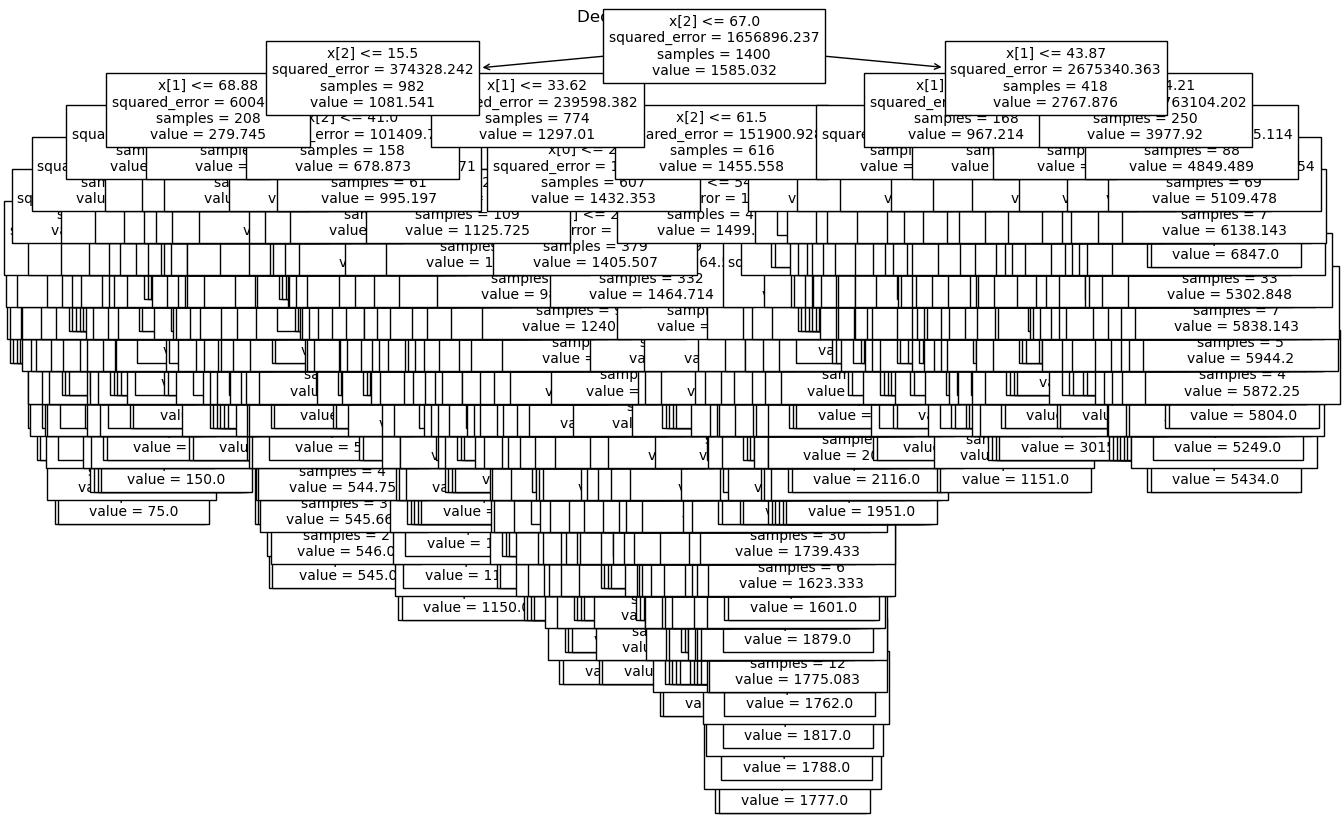

In [83]:
# Plot initial decision tree

fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(regressor, fontsize = 10)
plt.title('Decision tree (initial)')
plt.show()

In [84]:
# Use GridSearchCV to find best parameter values

parameters = {'max_depth': list(range(1, 5))}

# Create new model
regressor_gs = DecisionTreeRegressor(random_state = 42)
regressor_gs = GridSearchCV(regressor_gs, parameters)

# Fit new model
regressor_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4]})

In [85]:
# Determine best parameters

regressor_gs.best_params_

{'max_depth': 4}

Text(0.5, 1.0, 'Optimal depth for decision tree')

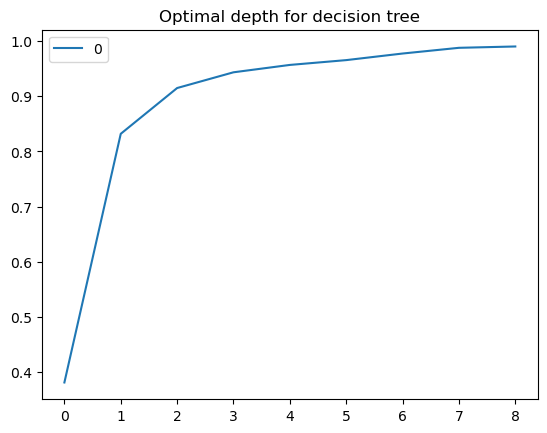

In [86]:
# Determine optimal max depth

# Values to try for max_depth
max_depth_range = list(range(1, 10))

# Calculate accuracy for each value of max_depth
accuracy = []

for depth in max_depth_range:
    dtr = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    
    dtr.fit(X_train, y_train)
    
    score = dtr.score(X_test, y_test)
    accuracy.append(score)
    
# Plot accuracy values
accuracy = pd.DataFrame(accuracy)
accuracy.plot()
plt.title('Optimal depth for decision tree')

##### Observations
IMPROVING THE MODEL
- Visually the decision tree looks complicated and difficult to read.
- I used GridSearchCV and accuracy score to calculate the optimal max depth for our model and will compare it to other max depths.

In [87]:
# Create new model with max depth at 2

regressor = DecisionTreeRegressor(max_depth = 2, random_state = 42)

regressor = regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

# Check model accuracy

mae = round(metrics.mean_absolute_error(y_test, y_predict), 2)
mae_train = round(metrics.mean_absolute_error(y_train, y_predict_train), 2)

rsme = round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)
rsme_train = round(math.sqrt(metrics.mean_squared_error(y_train, y_predict_train)), 2)

difference = round(rsme - mae, 2)
difference_train = round(rsme_train - mae_train, 2)

rsqu = round(r2_score(y_test, y_predict), 2)
rsqu_train = round(r2_score(y_train, y_predict_train), 2)

print('Max depth = 2 \n')
print('Test data')
print('Mean absolute error MAE: ', mae)
print('Root Mean Squared Error RSME: ', rsme)
print('Difference: ', difference)
print('R-squared: ', rsqu)

print('\nTrain data')
print('Mean absolute error MAE: ', mae_train)
print('Root Mean Squared Error RSME: ', rsme_train)
print('Difference: ', difference_train)
print('R-squared: ', rsqu_train)

Max depth = 2 

Test data
Mean absolute error MAE:  377.19
Root Mean Squared Error RSME:  521.87
Difference:  144.68
R-squared:  0.83

Train data
Mean absolute error MAE:  393.01
Root Mean Squared Error RSME:  538.16
Difference:  145.15
R-squared:  0.83


In [88]:
# Create new model with max depth at 3

regressor = DecisionTreeRegressor(max_depth = 3, random_state = 42)

regressor = regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

# Check model accuracy

mae = round(metrics.mean_absolute_error(y_test, y_predict), 2)
mae_train = round(metrics.mean_absolute_error(y_train, y_predict_train), 2)

rsme = round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)
rsme_train = round(math.sqrt(metrics.mean_squared_error(y_train, y_predict_train)), 2)

difference = round(rsme - mae, 2)
difference_train = round(rsme_train - mae_train, 2)

rsqu = round(r2_score(y_test, y_predict), 2)
rsqu_train = round(r2_score(y_train, y_predict_train), 2)

print('Max depth = 3 \n')
print('Test data')
print('Mean absolute error MAE: ', mae)
print('Root Mean Squared Error RSME: ', rsme)
print('Difference: ', difference)
print('R-squared: ', rsqu)

print('\nTrain data')
print('Mean absolute error MAE: ', mae_train)
print('Root Mean Squared Error RSME: ', rsme_train)
print('Difference: ', difference_train)
print('R-squared: ', rsqu_train)

Max depth = 3 

Test data
Mean absolute error MAE:  267.13
Root Mean Squared Error RSME:  371.43
Difference:  104.3
R-squared:  0.91

Train data
Mean absolute error MAE:  277.9
Root Mean Squared Error RSME:  385.31
Difference:  107.41
R-squared:  0.91


In [89]:
# Create new model with max depth at 4

regressor = DecisionTreeRegressor(max_depth = 4, random_state = 42)

regressor = regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

# Check model accuracy

mae = round(metrics.mean_absolute_error(y_test, y_predict), 2)
mae_train = round(metrics.mean_absolute_error(y_train, y_predict_train), 2)

rsme = round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)
rsme_train = round(math.sqrt(metrics.mean_squared_error(y_train, y_predict_train)), 2)

difference = round(rsme - mae, 2)
difference_train = round(rsme_train - mae_train, 2)

rsqu = round(r2_score(y_test, y_predict), 2)
rsqu_train = round(r2_score(y_train, y_predict_train), 2)

print('Max depth = 4 \n')
print('Test data')
print('Mean absolute error MAE: ', mae)
print('Root Mean Squared Error RSME: ', rsme)
print('Difference: ', difference)
print('R-squared: ', rsqu)

print('\nTrain data')
print('Mean absolute error MAE: ', mae_train)
print('Root Mean Squared Error RSME: ', rsme_train)
print('Difference: ', difference_train)
print('R-squared: ', rsqu_train)

Max depth = 4 

Test data
Mean absolute error MAE:  215.36
Root Mean Squared Error RSME:  302.93
Difference:  87.57
R-squared:  0.94

Train data
Mean absolute error MAE:  211.22
Root Mean Squared Error RSME:  298.87
Difference:  87.65
R-squared:  0.95


In [90]:
# Create new model with max depth at 5

regressor = DecisionTreeRegressor(max_depth = 5, random_state = 42)

regressor = regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

# Check model accuracy

mae = round(metrics.mean_absolute_error(y_test, y_predict), 2)
mae_train = round(metrics.mean_absolute_error(y_train, y_predict_train), 2)

rsme = round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)
rsme_train = round(math.sqrt(metrics.mean_squared_error(y_train, y_predict_train)), 2)

difference = round(rsme - mae, 2)
difference_train = round(rsme_train - mae_train, 2)

rsqu = round(r2_score(y_test, y_predict), 2)
rsqu_train = round(r2_score(y_train, y_predict_train), 2)

print('Max depth = 5 \n')
print('Test data')
print('Mean absolute error MAE: ', mae)
print('Root Mean Squared Error RSME: ', rsme)
print('Difference: ', difference)
print('R-squared: ', rsqu)

print('\nTrain data')
print('Mean absolute error MAE: ', mae_train)
print('Root Mean Squared Error RSME: ', rsme_train)
print('Difference: ', difference_train)
print('R-squared: ', rsqu_train)

Max depth = 5 

Test data
Mean absolute error MAE:  176.81
Root Mean Squared Error RSME:  264.8
Difference:  87.99
R-squared:  0.96

Train data
Mean absolute error MAE:  173.81
Root Mean Squared Error RSME:  253.33
Difference:  79.52
R-squared:  0.96


##### Observations
PRUNING THE MODEL: MAX DEPTH
- Using a max depth of 5 results in the best fit model, especially when looking at both the test data and train data results. 
- The R-squared value for both is 0.96, indicating that both the test and train set are a great fit.
- Difference is the smallest with the depth of 5, but we
- However, we looking at the descriptive statistics we did see a large variance in the data points so while the r-squared has improved and showing less signs of overfitting we need to keep this in mind.
- With this in mind, we'll look at feature importance and see if we can prune the decision tree further to improve the model.

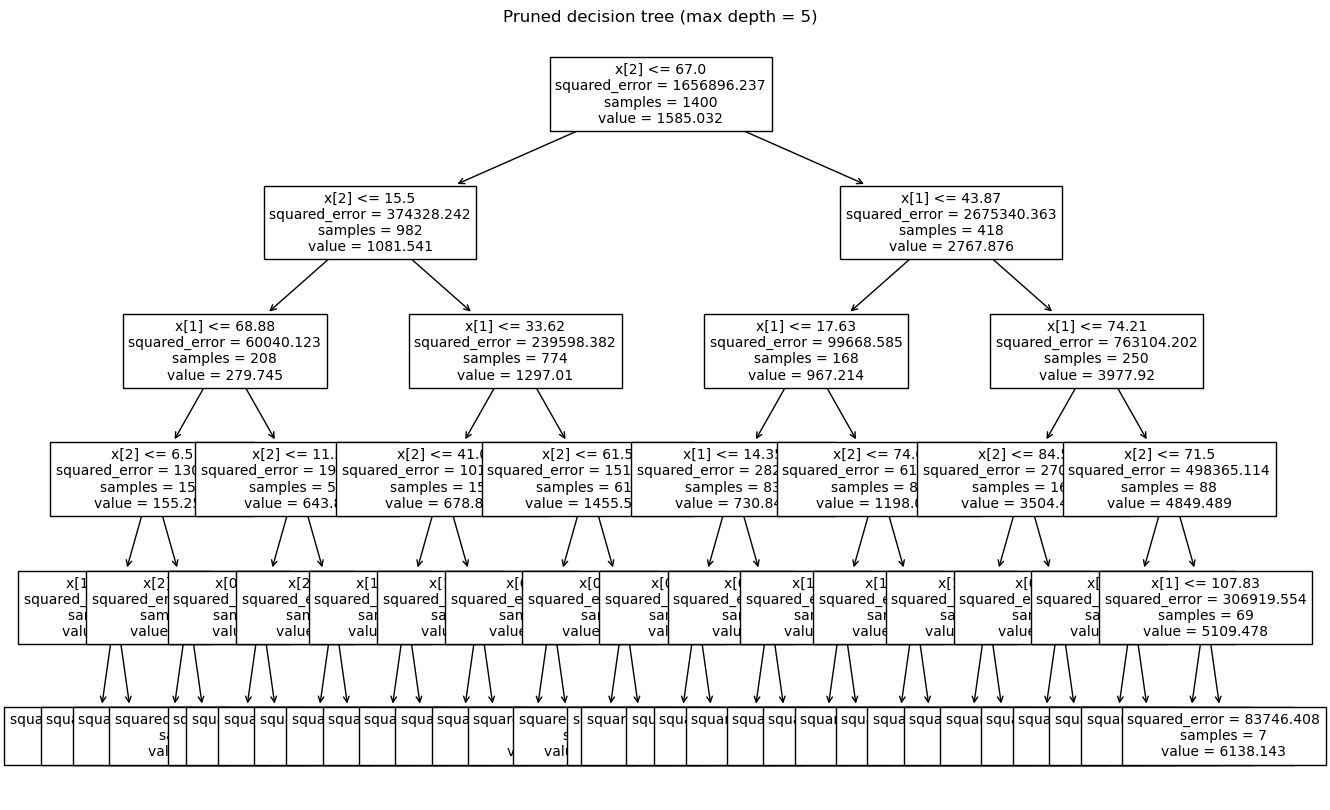

In [91]:
# Plot pruned decision tree

fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(regressor, fontsize = 10)
plt.title('Pruned decision tree (max depth = 5)')
plt.show()

                  Feature  Importance
3             gender_Male    0.000000
4             gender_Male    0.000000
5           education_PhD    0.000000
6       education_diploma    0.000000
7      education_graduate    0.000000
8  education_postgraduate    0.000000
0                     age    0.009190
2             spend_score    0.486944
1               income_£k    0.503866


<function matplotlib.pyplot.show(close=None, block=None)>

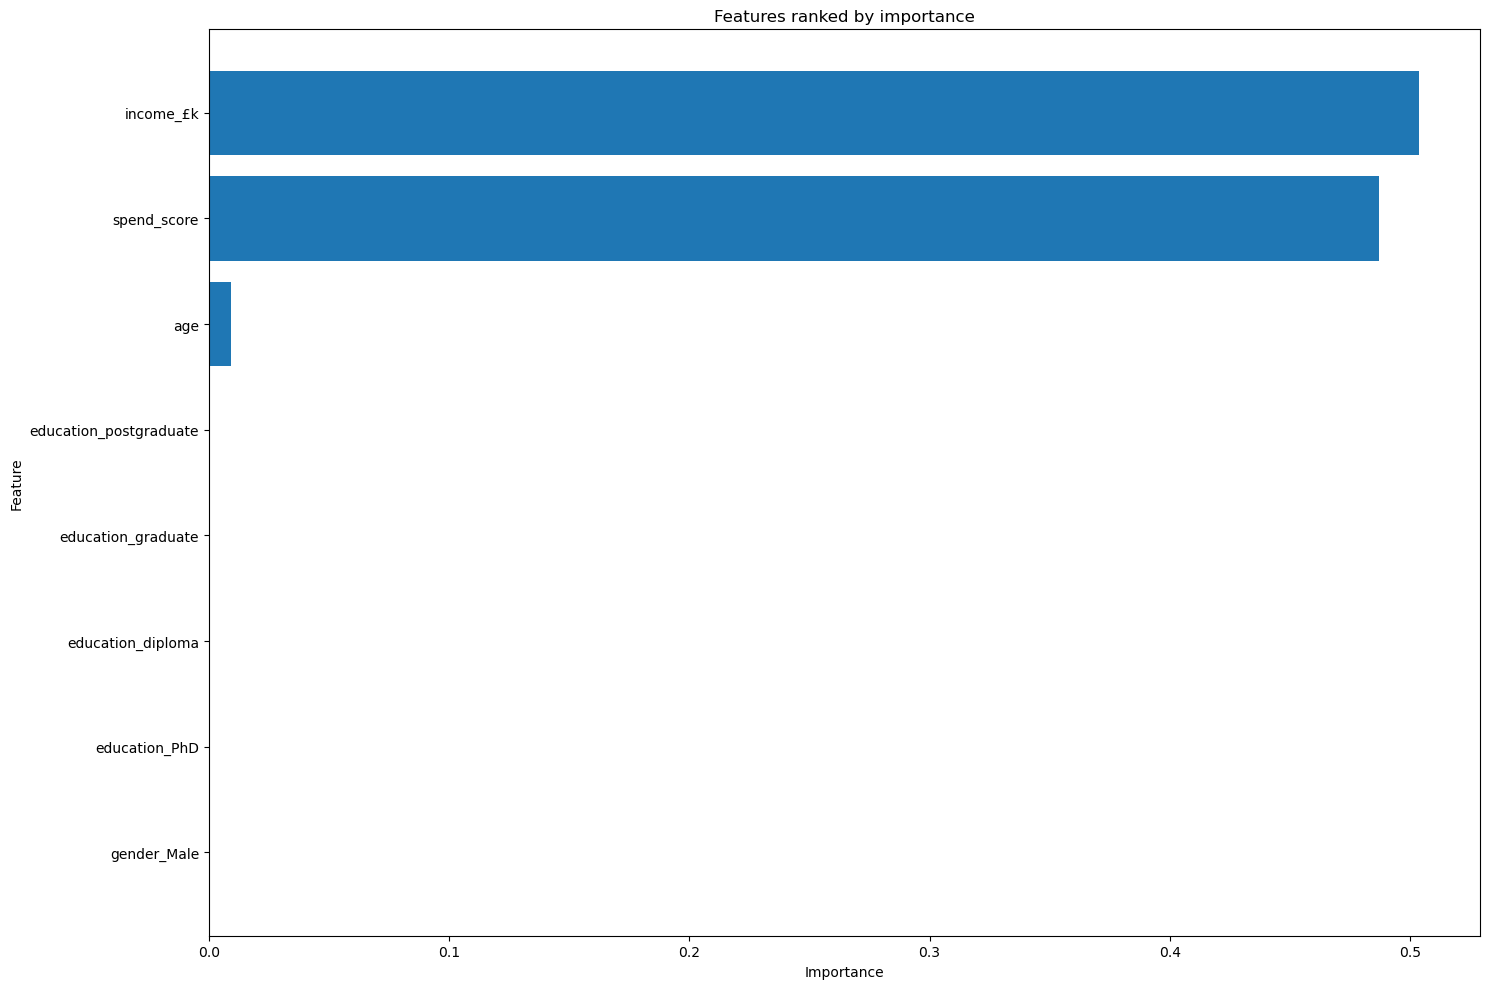

In [92]:
# Determine feature importance to identify which features to keep

# Create list of feature names
feature_names = [c for c in X.columns]

# Determine feature importance
importance = regressor.feature_importances_

# Create dataframe to hold feature importance values
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = True)
print(importance_df)

# Plot feature importances
plt.figure(figsize = (15, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Features ranked by importance')
plt.tight_layout()
plt.show

##### Observations
FEATURE IMPORTANCE
- From this plot it's easy to see that income is the most important feature (50.38%), followed closely by spend score (48.69%). 
- All other features are not significant because their importance calculation is less than 1% or 0%.

In [93]:
# Redo decision tree regression removing all features except income and spend

# Import data
reviews3 = pd.read_csv('turtle_reviews_clean.csv')

# Remove unnecessary columns (product, review, summary)
reviews3.drop(columns = ['product', 'review', 'summary', 'gender', 'age', 'education'], inplace = True)
reviews3.head()

income_£k  spend_score  loyalty_points
0      12.30           39             210
1      12.30           81             524
2      13.12            6              40
3      13.12           77             562
4      13.94           40             366

In [94]:
# Specify features(independent) and target (dependent variable)

# features
X = reviews3.drop(['loyalty_points'], axis = 1)

# target
y = reviews3['loyalty_points']

# Split data into train and test 30:70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
# Create and fit decision tree regressor

regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

In [96]:
# Check model accuracy of two feature decision tree

mae = round(metrics.mean_absolute_error(y_test, y_predict), 2)
mae_train = round(metrics.mean_absolute_error(y_train, y_predict_train), 2)

rsme = round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)
rsme_train = round(math.sqrt(metrics.mean_squared_error(y_train, y_predict_train)), 2)

difference = round(rsme - mae, 2)
difference_train = round(rsme_train - mae_train, 2)

rsqu = round(r2_score(y_test, y_predict), 2)
rsqu_train = round(r2_score(y_train, y_predict_train), 2)

print('Results using only 2 features (spend score and income)')
print('\nTest data')
print('Mean absolute error MAE: ', mae)
print('Root Mean Squared Error RSME: ', rsme)
print('Difference: ', difference)
print('R-squared: ', rsqu)

print('\nTrain data')
print('Mean absolute error MAE: ', mae_train)
print('Root Mean Squared Error RSME: ', rsme_train)
print('Difference: ', difference_train)
print('R-squared: ', rsqu_train)

Results using only 2 features (spend score and income)

Test data
Mean absolute error MAE:  83.27
Root Mean Squared Error RSME:  161.55
Difference:  78.28
R-squared:  0.98

Train data
Mean absolute error MAE:  69.16
Root Mean Squared Error RSME:  135.85
Difference:  66.69
R-squared:  0.99


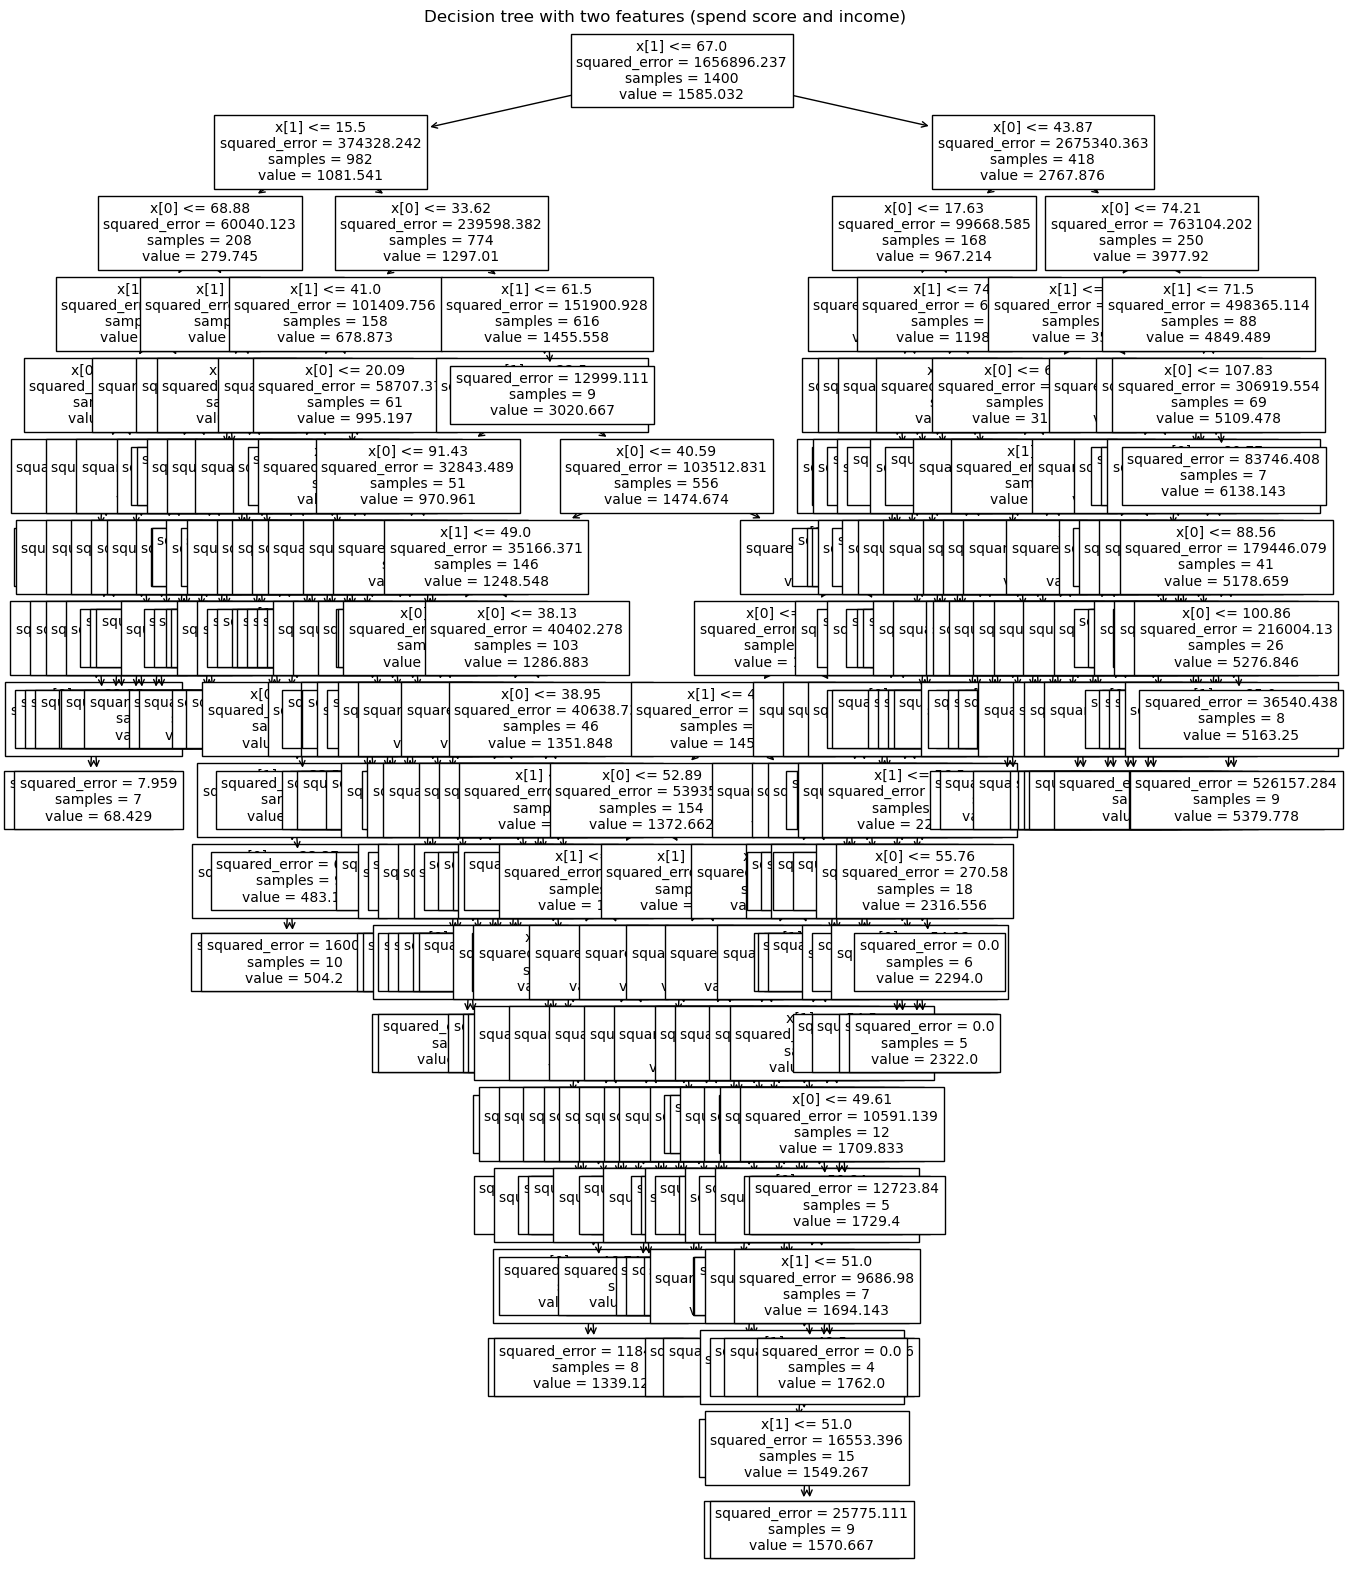

In [97]:
# Plot decision tree (two features)

fig, ax = plt.subplots(figsize = (15, 20))
plot_tree(regressor, fontsize = 10)
plt.title('Decision tree with two features (spend score and income)')
plt.show()

##### Observations
DECISION TREE WITH 2 FEATURES
- While the results are better (difference has reduced and R-squared has increased) the visual tree still looks a bit complicated.
- Suggest prune it further to max depth of 5 as we did previously.

In [98]:
# Create new tree with 2 features and max depth at 5

regressor2 = DecisionTreeRegressor(max_depth = 5, random_state = 42)

regressor2 = regressor2.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
y_predict_train = regressor2.predict(X_train)

# Check model accuracy

mae = round(metrics.mean_absolute_error(y_test, y_predict), 2)
mae_train = round(metrics.mean_absolute_error(y_train, y_predict_train), 2)

rsme = round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)), 2)
rsme_train = round(math.sqrt(metrics.mean_squared_error(y_train, y_predict_train)), 2)

difference = round(rsme - mae, 2)
difference_train = round(rsme_train - mae_train, 2)

rsqu = round(r2_score(y_test, y_predict), 2)
rsqu_train = round(r2_score(y_train, y_predict_train), 2)

print('Pruned results based on two features (spend and income)')
print('Max depth = 5 \n')
print('Test data')
print('Mean absolute error MAE: ', mae)
print('Root Mean Squared Error RSME: ', rsme)
print('Difference: ', difference)
print('R-squared: ', rsqu)

print('\nTrain data')
print('Mean absolute error MAE: ', mae_train)
print('Root Mean Squared Error RSME: ', rsme_train)
print('Difference: ', difference_train)
print('R-squared: ', rsqu_train)

Pruned results based on two features (spend and income)
Max depth = 5 

Test data
Mean absolute error MAE:  83.27
Root Mean Squared Error RSME:  161.55
Difference:  78.28
R-squared:  0.98

Train data
Mean absolute error MAE:  178.38
Root Mean Squared Error RSME:  255.49
Difference:  77.11
R-squared:  0.96


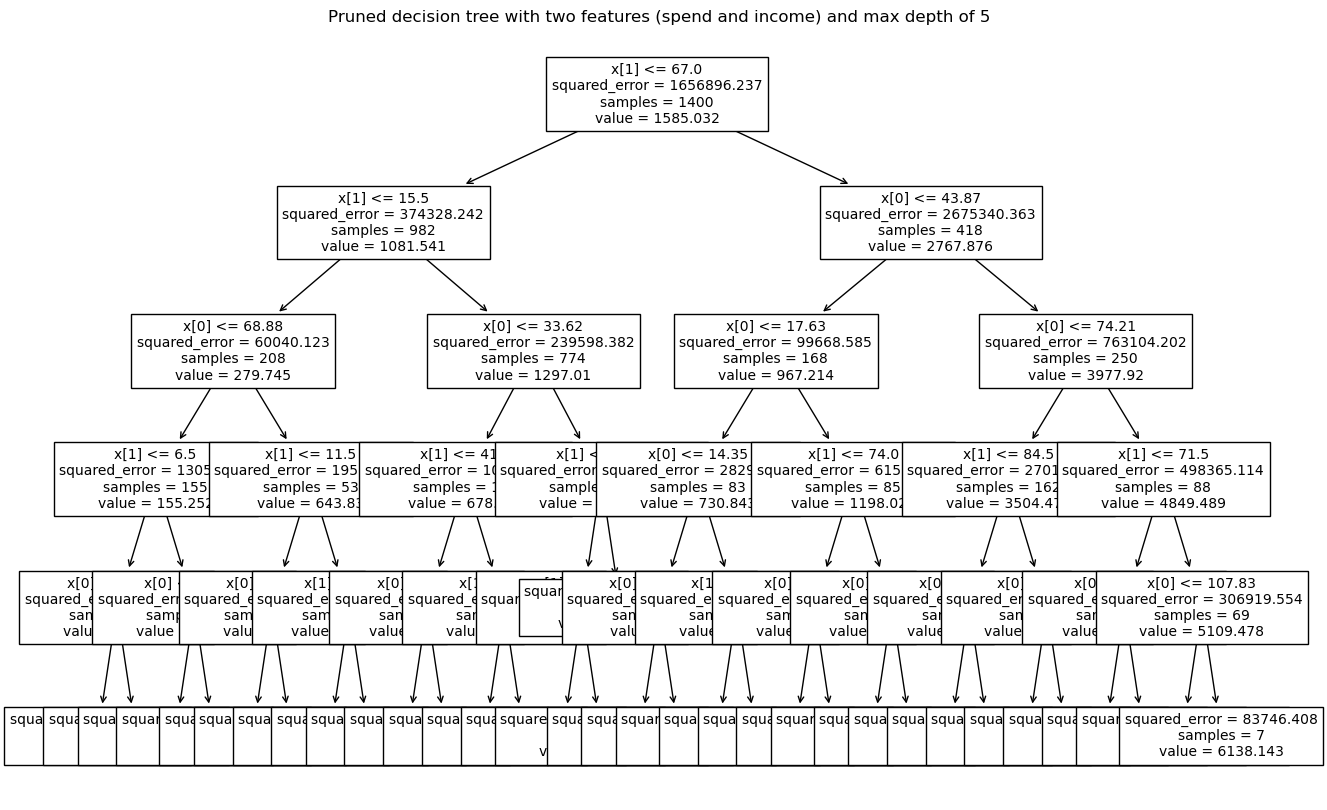

In [99]:
# Plot pruned decision tree (two features and max depth of 5)

fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(regressor2, fontsize = 10)
plt.title('Pruned decision tree with two features (spend and income) and max depth of 5')
plt.show()

##### Observations
FEATURE IMPORTANCE AND FURTHER PRUNING
- Removing the unimportant features improved the model.
- Visually the decision tree using only the two importance features (spend and income) is quite complicated. Changing the max depth made the decision tree less complicated and had minimal effect on the models accuracy results.

# Predictive analytics: k-means clustering

In [100]:
# Import cleaned csv file and create new dataframe

# Import data
reviews3 = pd.read_csv('turtle_reviews_clean.csv')

# Check data loaded
reviews3.head()

gender  age  income_£k  spend_score  loyalty_points education  product  \
0    Male   18      12.30           39             210  graduate      453   
1    Male   23      12.30           81             524  graduate      466   
2  Female   22      13.12            6              40  graduate      254   
3  Female   25      13.12           77             562  graduate      263   
4  Female   33      13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [101]:
# Remove unnecessary columns

reviews3 = reviews3[['income_£k','spend_score']]

# Use function to explore data
review_data(reviews3)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   income_£k    2000 non-null   float64
 1   spend_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB

MISSING VALUES
income_£k      0
spend_score    0
dtype: int64

COUNT OF DUPLICATES
1804

COUNT UNIQUE
income_£k      64
spend_score    84
dtype: int64

DESCRIPTIVE STATS
         income_£k  spend_score
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000



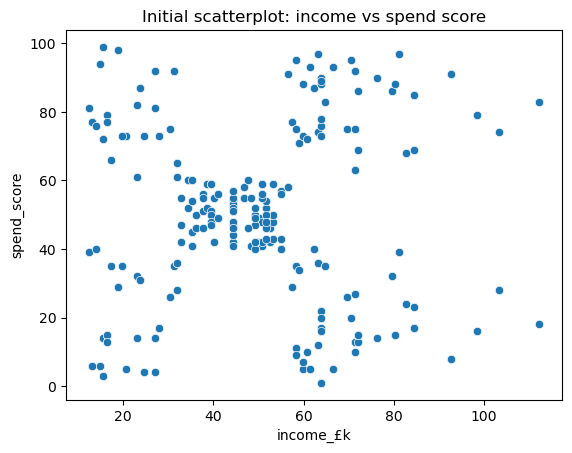

In [102]:
# Scatterplot to see correlations and clusters

sns.scatterplot(data = reviews3, x = 'income_£k', y = 'spend_score')
plt.title('Initial scatterplot: income vs spend score')
plt.show()

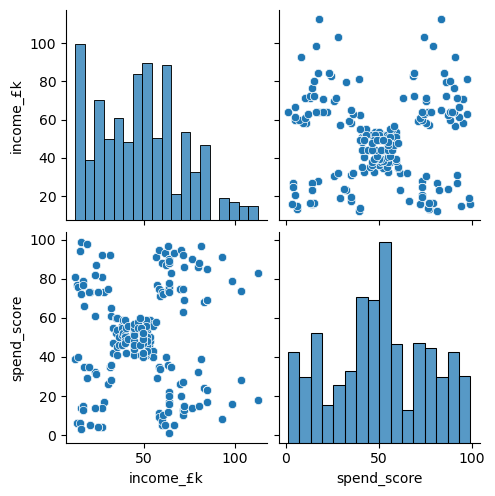

In [103]:
# Pairplot to see correlations and clusters

sns.pairplot(reviews3)

##### Observations
INITIAL PLOTS
- From the initial scatterplot we can see there are 5 clusters, and the overall shape resembles a four spoke wheel.
- In terms of distribution income is skewed to the left, while spend score appears more normally distributed.

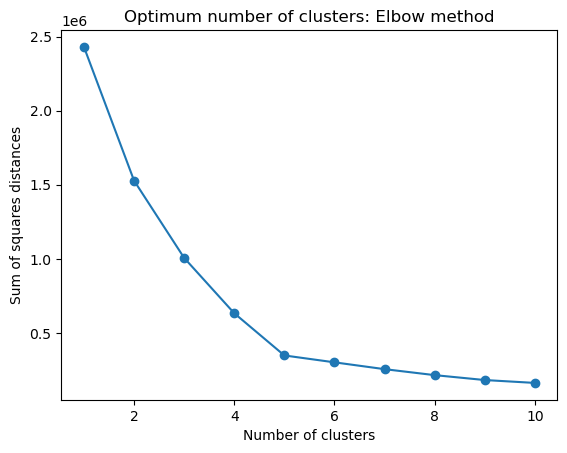

In [104]:
# Determine ideal number of clusters for k-means using Elbow method

X = reviews3[['income_£k', 'spend_score']]

# Create empty list for sum of squares (ss)
elbow = []

for k in range (1, 11):
    kmeans = KMeans(n_clusters = k,
                   init = 'k-means++',
                   n_init = 10,
                   random_state = 42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
      
# Plot elbow
plt.plot(range(1, 11), elbow, marker = 'o')
plt.title('Optimum number of clusters: Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares distances')
plt.show()

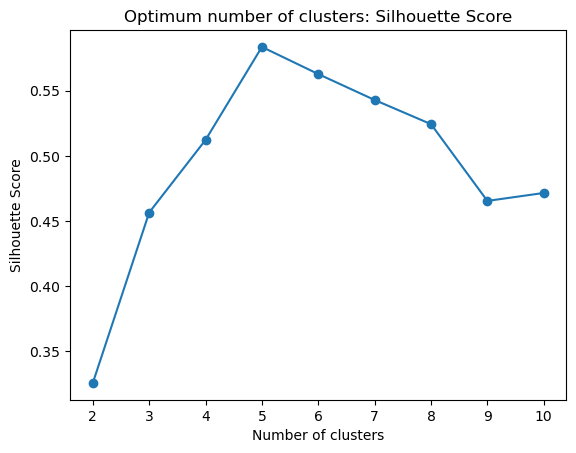

In [105]:
# Compare with Silhouette Score

sil_score = []

for k in range (2, 11):
    k_means = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    k_means.fit(X)
    y_pred = k_means.predict(X)
    
    sil_avg = silhouette_score(X, y_pred)
    sil_score.append(sil_avg)
    
# Plot
plt.plot(range(2, 11), sil_score, marker = 'o')
plt.title('Optimum number of clusters: Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### Observations
OPTIMAL NUMBER OF CLUSTERS
- From both the elbow method and silhouette score we can see that 5 is the optimal number of clusters.

In [106]:
# Fit model using 5 clusters

kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 42)
kmeans.fit(X)

# Make predictions
y = kmeans.predict(X)

#  Add clusters to a column in dataframe and view
reviews3['label'] = y
reviews3

income_£k  spend_score  label
0         12.30           39      3
1         12.30           81      1
2         13.12            6      3
3         13.12           77      1
4         13.94           40      3
...         ...          ...    ...
1995      84.46           69      2
1996      92.66            8      4
1997      92.66           91      2
1998      98.40           16      4
1999      92.66            8      4

[2000 rows x 3 columns]

In [107]:
# Confirm number of clusters and their label

reviews3['label'].unique()

array([3, 1, 0, 2, 4], dtype=int32)

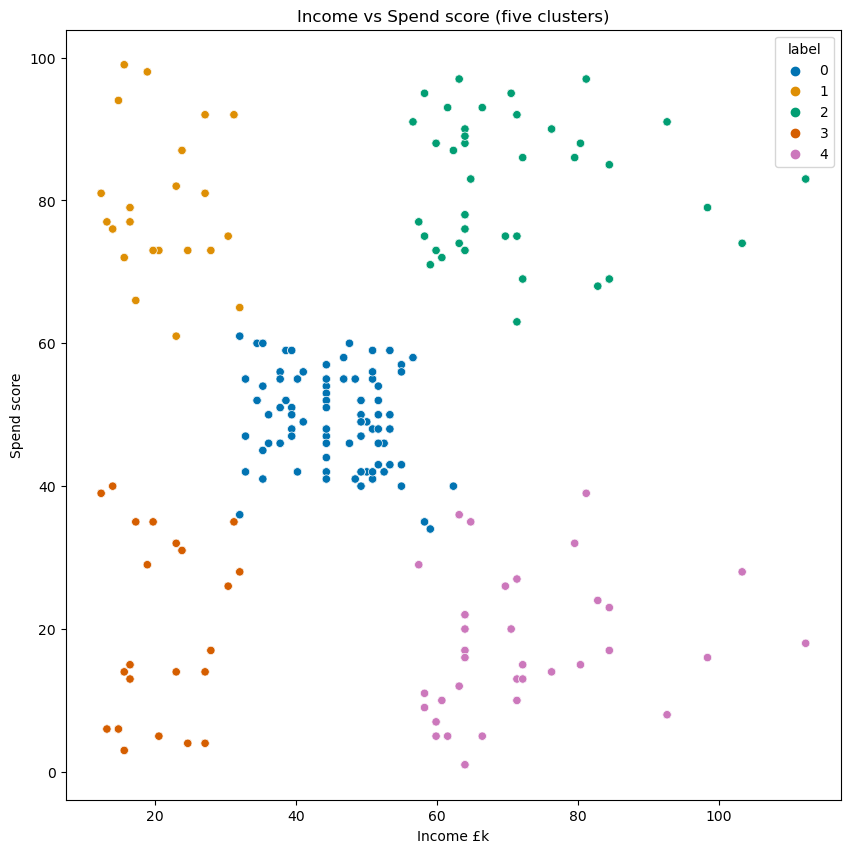

In [108]:
# Plot clusters

plt.figure(figsize = (10, 10))
sns.scatterplot(data = reviews3, x = 'income_£k', y = 'spend_score', hue = 'label',
               palette = 'colorblind', legend = 'full')
plt.title('Income vs Spend score (five clusters)')
plt.xlabel('Income £k')
plt.ylabel('Spend score')
plt.show()

##### Observations
FIVE CLUSTERS
- It's clear that there are five distinct clusters. The four clusters on the outer edges are of similar sizes, and the central cluster (blue) has a bigger concentration of data points.

In [109]:
# Fit model using 3 clusters

kmeans3 = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans3.fit(X)

# Make predictions
y = kmeans3.predict(X)

# Add clusters to a column in dataframe and view
reviews3['label_3'] = y
reviews3

income_£k  spend_score  label  label_3
0         12.30           39      3        1
1         12.30           81      1        1
2         13.12            6      3        1
3         13.12           77      1        1
4         13.94           40      3        1
...         ...          ...    ...      ...
1995      84.46           69      2        2
1996      92.66            8      4        0
1997      92.66           91      2        2
1998      98.40           16      4        0
1999      92.66            8      4        0

[2000 rows x 4 columns]

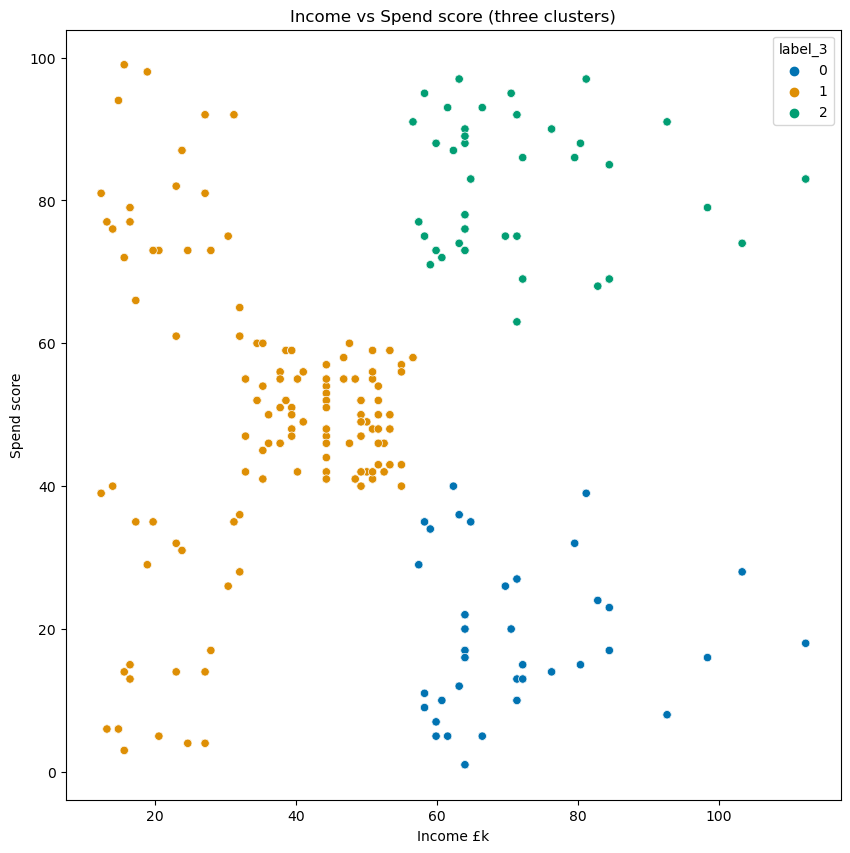

In [110]:
# Plot with 3 clusters

plt.figure(figsize = (10, 10))
sns.scatterplot(data = reviews3, x = 'income_£k', y = 'spend_score', hue = 'label_3',
               palette = 'colorblind', legend = 'full')
plt.title('Income vs Spend score (three clusters)')
plt.xlabel('Income £k')
plt.ylabel('Spend score')
plt.show()

##### Observations
THREE CLUSTERS
- Three clusters does not perform as well as with 5. 
- Cluster 1 (gold) takes up nearly half of the data points.
- Income: £10k - £60k (half the range)
- Score: 10 - 100 (full range)

In [111]:
# Fit model using 4 clusters

kmeans4 = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans4.fit(X)

# Make predictions
y = kmeans4.predict(X)

# Add clusters to a column in dataframe and view
reviews3['label_4'] = y
reviews3

income_£k  spend_score  label  label_3  label_4
0         12.30           39      3        1        1
1         12.30           81      1        1        1
2         13.12            6      3        1        1
3         13.12           77      1        1        1
4         13.94           40      3        1        1
...         ...          ...    ...      ...      ...
1995      84.46           69      2        2        2
1996      92.66            8      4        0        0
1997      92.66           91      2        2        2
1998      98.40           16      4        0        0
1999      92.66            8      4        0        0

[2000 rows x 5 columns]

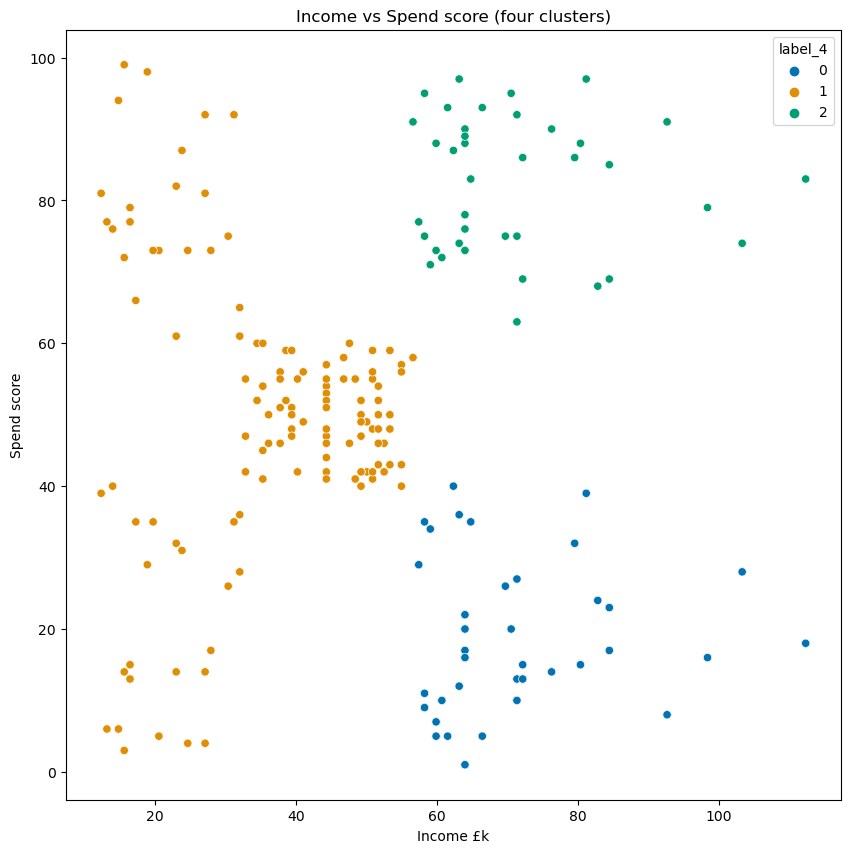

In [112]:
# Plot with 4 clusters

plt.figure(figsize = (10, 10))
sns.scatterplot(data = reviews3, x = 'income_£k', y = 'spend_score', hue = 'label_4',
               palette = 'colorblind', legend = 'full')
plt.title('Income vs Spend score (four clusters)')
plt.xlabel('Income £k')
plt.ylabel('Spend score')
plt.show()

##### Observations
FOUR CLUSTERS
- Four clusters does not perform as well as with 5. 
- All the data from the centre to the left (gold) is too large of a cluster in comparison to blue and green.

In [113]:
# Fit model using 6 clusters

kmeans6 = KMeans(n_clusters = 6, n_init = 10, random_state = 42)
kmeans6.fit(X)

# Make predictions
y = kmeans6.predict(X)

# Add clusters to a column in dataframe and view
reviews3['label_6'] = y
reviews3

income_£k  spend_score  label  label_3  label_4  label_6
0         12.30           39      3        1        1        3
1         12.30           81      1        1        1        4
2         13.12            6      3        1        1        3
3         13.12           77      1        1        1        4
4         13.94           40      3        1        1        3
...         ...          ...    ...      ...      ...      ...
1995      84.46           69      2        2        2        2
1996      92.66            8      4        0        0        0
1997      92.66           91      2        2        2        2
1998      98.40           16      4        0        0        0
1999      92.66            8      4        0        0        0

[2000 rows x 6 columns]

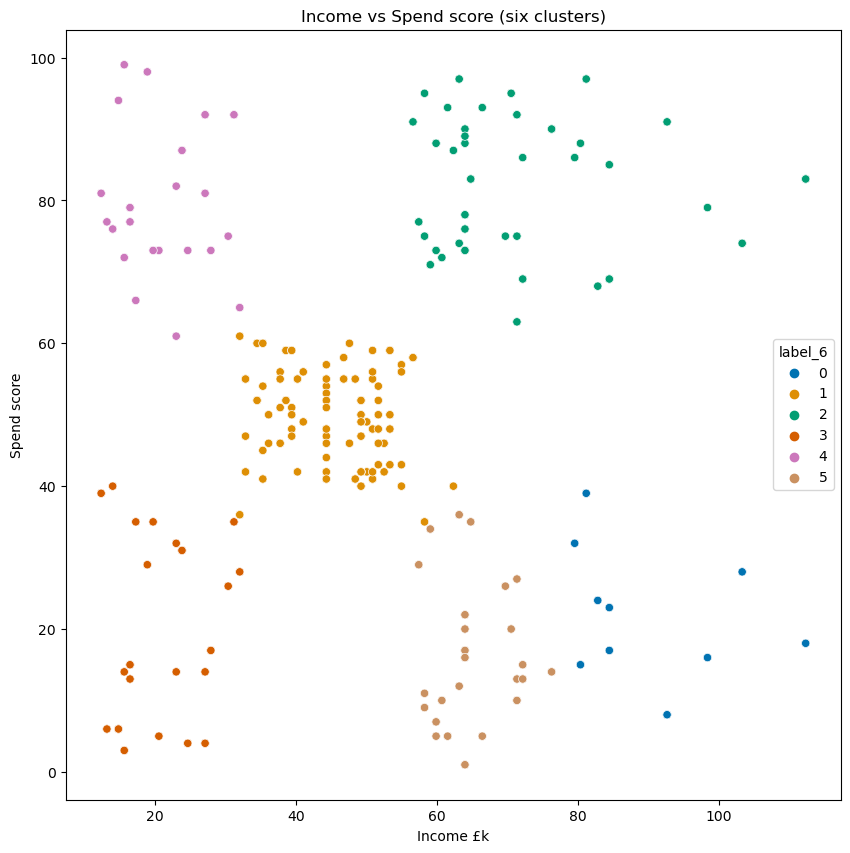

In [114]:
# Plot with 6 clusters

plt.figure(figsize = (10, 10))
sns.scatterplot(data = reviews3, x = 'income_£k', y = 'spend_score', hue = 'label_6',
               palette = 'colorblind', legend = 'full')
plt.title('Income vs Spend score (six clusters)')
plt.xlabel('Income £k')
plt.ylabel('Spend score')
plt.show()

##### Observations
SIX CLUSTERS
- Six clusters does not perform as well compared to five.
- The cluster in the bottom right corner where Income: £60k - £100+k and Score: 10 - 40 is now split into two smaller clusters, which I don't feel adds any value.

In [115]:
# Rename clusters

# Create the dictionary
label_names = {2 : 'Luxury', 
               1 : 'Spendthrift', 
               0 : 'Middleground', 
               4 : 'Frugal',
               3 : 'Budget'}
 
# Add a new column
reviews3['Cluster'] = reviews3['label'].map(label_names)
 
# Print the DataFrame
reviews3.head()

income_£k  spend_score  label  label_3  label_4  label_6      Cluster
0      12.30           39      3        1        1        3       Budget
1      12.30           81      1        1        1        4  Spendthrift
2      13.12            6      3        1        1        3       Budget
3      13.12           77      1        1        1        4  Spendthrift
4      13.94           40      3        1        1        3       Budget

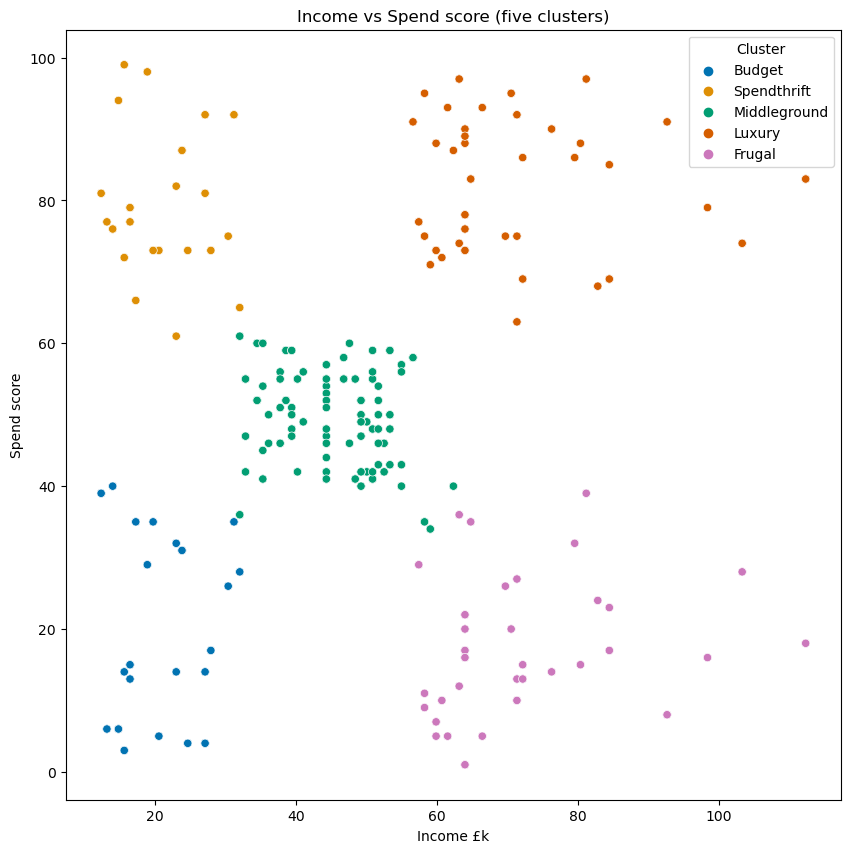

In [116]:
# Replot five clusters

# Fit model using 5 clusters

kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 42)
kmeans.fit(X)

# Make predictions
y = kmeans.predict(X)

#  Add clusters to a column in dataframe and view
reviews3['label'] = y
reviews3

# Plot clusters

plt.figure(figsize = (10, 10))
sns.scatterplot(data = reviews3, x = 'income_£k', y = 'spend_score', hue = 'Cluster',
               palette = 'colorblind', legend = 'full')
plt.title('Income vs Spend score (five clusters)')
plt.xlabel('Income £k')
plt.ylabel('Spend score')
plt.show()

In [117]:
# Number of customers per cluster

reviews3['Cluster'].value_counts()

Cluster
Middleground    774
Luxury          356
Frugal          330
Budget          271
Spendthrift     269
Name: count, dtype: int64

##### Observations

**Luxury**
- High earner, high spender
- Income: £60k - £100+k
- Spend score: 60 - 100

**Spendthrift**
- Low earner, high spender
- Income: £10k - £40k
- Score: 60 - 100

**Middleground**
- Moderate income, moderate spender
- Income: £40k - £60k
- Score: 40 - 60

**Frugal**
- High earner, low spender
- Income: £60k - £100+k
- Score: 10 - 40

**Budget**
- Low income, low spender
- Income: £10k - £40k
- Score: 10 - 40

# Sentiment analysis: Word Clouds

In [118]:
# Import cleaned csv file and create new dataframe

# Import data
reviews4 = pd.read_csv('turtle_reviews_clean.csv')

# Select required columns
reviews4 = reviews4[['review','summary']]

# Use function to review data
review_data(reviews4)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB

MISSING VALUES
review     0
summary    0
dtype: int64

COUNT OF DUPLICATES
18

COUNT UNIQUE
review     1980
summary    1432
dtype: int64

DESCRIPTIVE STATS
         review     summary
count      2000        2000
unique     1980        1432
top     love it  Five Stars
freq          5         378



In [119]:
# Use function to preprocess data on review column
# preprocess(df, column, col_clean)

preprocess(reviews4, 'review', 'review_clean')

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   
5                                     Grandson loves   
6  I have bought many gm screens over the years, ...   
7                         Came in perfect condition.   
8  Could be better but its still great. I love th...   
9  My review will mirror others in that this kind...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   
5                                         Five Stars   
6                                Best gm screen ever   
7                                         Five Stars   
8                     Great but could be even better   
9  Another missed opportunity.  Not a value add t...   

                                        review_clean  
0  comes dms screen space screen absolute premium...  
1  open letter galeforce9 unpainted miniatures no...  
2  nice art nice printing two panels filled gener...  
3             amazing buy bought gift new dm perfect  
4  review gf9s previous screens completely unnece...  
5                                     grandson loves  
6  bought many gm screens years one best ever see...  
7                             came perfect condition  
8  could better still great love things dms side ...  
9  review mirror others kind misses mark lost opp...

In [120]:
preprocess(reviews4, 'summary', 'summary_clean')

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   
5                                     Grandson loves   
6  I have bought many gm screens over the years, ...   
7                         Came in perfect condition.   
8  Could be better but its still great. I love th...   
9  My review will mirror others in that this kind...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   
5                                         Five Stars   
6                                Best gm screen ever   
7                                         Five Stars   
8                     Great but could be even better   
9  Another missed opportunity.  Not a value add t...   

                                        review_clean  \
0  comes dms screen space screen absolute premium...   
1  open letter galeforce9 unpainted miniatures no...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf9s previous screens completely unnece...   
5                                     grandson loves   
6  bought many gm screens years one best ever see...   
7                             came perfect condition   
8  could better still great love things dms side ...   
9  review mirror others kind misses mark lost opp...   

                                       summary_clean  
0  fact 50 space wasted art not terribly informat...  
1  another worthless dungeon masters screen galef...  
2                         pretty also pretty useless  
3                                         five stars  
4                                         money trap  
5                                         five stars  
6                                best gm screen ever  
7                                         five stars  
8                            great could even better  
9  another missed opportunity not value add produ...

In [121]:
# Check for duplicates in new clean columns

print(f"review_clean duplicates: ", reviews4.review_clean.duplicated().sum())
print(f"summary_clean duplicates: ", reviews4.summary_clean.duplicated().sum())
print(f"number of rows and columns: ", reviews4.shape)

review_clean duplicates:  74
summary_clean duplicates:  704
number of rows and columns:  (2000, 4)


In [122]:
# Remove duplicates and create new dataframe, reset index

reviews5 = reviews4.drop_duplicates(subset = ['review_clean', 'summary_clean'])
reviews5.reset_index(inplace = True)
reviews5.shape

(1943, 5)

In [123]:
reviews5.head()

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   
3      3  Amazing buy! Bought it as a gift for our new d...   
4      4  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                        review_clean  \
0  comes dms screen space screen absolute premium...   
1  open letter galeforce9 unpainted miniatures no...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf9s previous screens completely unnece...   

                                       summary_clean  
0  fact 50 space wasted art not terribly informat...  
1  another worthless dungeon masters screen galef...  
2                         pretty also pretty useless  
3                                         five stars  
4                                         money trap

In [124]:
# Tokenise words in review and summary clean columns

reviews5['tokenised_review'] = reviews5['review_clean'].apply(word_tokenize)
reviews5['tokenised_summary'] = reviews5['summary_clean'].apply(word_tokenize)

reviews5

index                                             review  \
0         0  When it comes to a DM's screen, the space on t...   
1         1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         2  Nice art, nice printing.  Why two panels are f...   
3         3  Amazing buy! Bought it as a gift for our new d...   
4         4  As my review of GF9's previous screens these w...   
...     ...                                                ...   
1938   1995  The perfect word game for mixed ages (with Mom...   
1939   1996  Great game.  Did not think I would like it whe...   
1940   1997  Great game for all.........\nKeeps the mind ni...   
1941   1998                                          fun game!   
1942   1999  This game is fun. A lot like scrabble without ...   

                                                summary  \
0     The fact that 50% of this space is wasted on a...   
1     Another worthless Dungeon Master's screen from...   
2                       pretty, but also pretty useless   
3                                            Five Stars   
4                                            Money trap   
...                                                 ...   
1938     The perfect word game for mixed ages (with Mom   
1939                                          Super fun   
1940                                         Great Game   
1941                                         Four Stars   
1942                                     Love this game   

                                           review_clean  \
0     comes dms screen space screen absolute premium...   
1     open letter galeforce9 unpainted miniatures no...   
2     nice art nice printing two panels filled gener...   
3                amazing buy bought gift new dm perfect   
4     review gf9s previous screens completely unnece...   
...                                                 ...   
1938  perfect word game mixed ages mom perhaps givin...   
1939  great game not think would like first received...   
1940                       great game keeps mind nimble   
1941                                           fun game   
1942  game fun lot like scrabble without little tile...   

                                          summary_clean  \
0     fact 50 space wasted art not terribly informat...   
1     another worthless dungeon masters screen galef...   
2                            pretty also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1938                   perfect word game mixed ages mom   
1939                                          super fun   
1940                                         great game   
1941                                         four stars   
1942                                          love game   

                                       tokenised_review  \
0     [comes, dms, screen, space, screen, absolute, ...   
1     [open, letter, galeforce9, unpainted, miniatur...   
2     [nice, art, nice, printing, two, panels, fille...   
3        [amazing, buy, bought, gift, new, dm, perfect]   
4     [review, gf9s, previous, screens, completely, ...   
...                                                 ...   
1938  [perfect, word, game, mixed, ages, mom, perhap...   
1939  [great, game, not, think, would, like, first, ...   
1940                 [great, game, keeps, mind, nimble]   
1941                                        [fun, game]   
1942  [game, fun, lot, like, scrabble, without, litt...   

                                      tokenised_summary  
0     [fact, 50, space, wasted, art, not, terribly, ...  
1     [another, worthless, dungeon, masters, screen,...  
2                       [pretty, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                          

In [125]:
# Join tokenised words together - Review

review_all = []

# Add contents of each row from tokenised_review

for i in range (reviews5.shape[0]):
    review_all = review_all + reviews5['tokenised_review'][i]    

# Convert list to string
review_all_st = ' '.join(review_all)

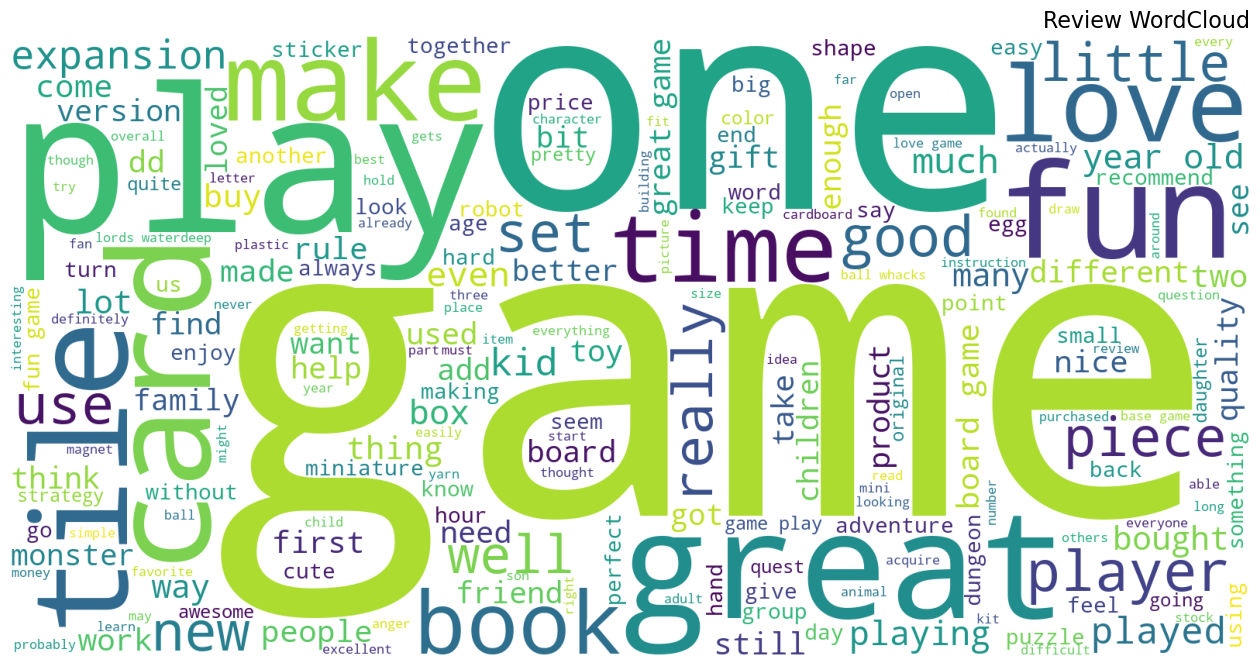

In [126]:
# Create WordCloud - Review (initial)

word_cloud_review = WordCloud(width = 1600, height = 800,
                               background_color = 'white',
                               colormap = 'viridis',
                               min_font_size = 8).generate(review_all_st)

plt.figure(figsize = (16, 9))
plt.imshow(word_cloud_review)
plt.title('Review WordCloud', fontsize = 16, loc = 'right')
plt.axis('off')
plt.show()

##### Observations
INITIAL REVIEW WORD CLOUD
- This word cloud for Review looks ok; relevant keywords like game, play, great stand out.
- However, 'one' also stands out so we may need to consider removing numbers.
- Also seeing other words that don't add value such as: come, around, using so may need to consider adding these to the stopwords.
- Overall I do not feel this visualisation gives much actionable insight into how people are feeling or what is important.

In [127]:
# Join tokenised words together - Summary

summary_all = []

# Add contents of each row from tokenised_review

for i in range (reviews5.shape[0]):
    summary_all = summary_all + reviews5['tokenised_summary'][i]    

# Convert list to string

summary_all_st = ' '.join(summary_all)

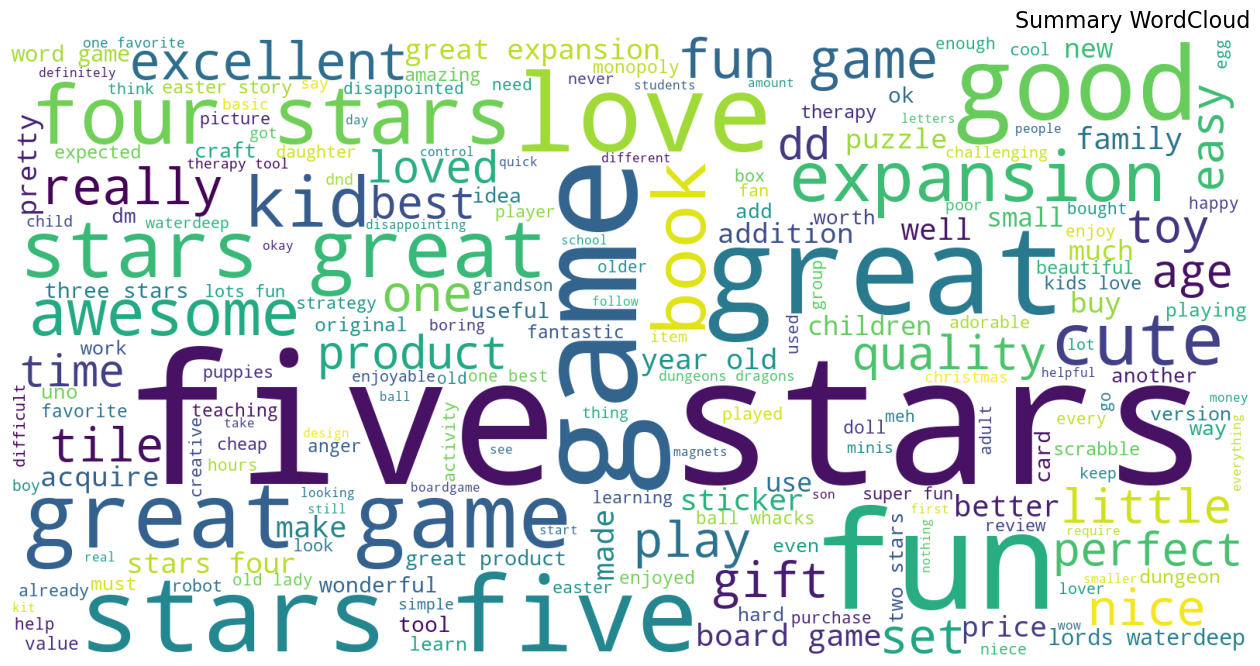

In [128]:
# Create WordCloud - Summary

word_cloud_review = WordCloud(width = 1600, height = 800,
                               background_color = 'white',
                               colormap = 'viridis',
                               min_font_size = 8).generate(summary_all_st)

plt.figure(figsize = (16, 9))
plt.imshow(word_cloud_review)
plt.title('Summary WordCloud', fontsize = 16, loc = 'right')
plt.axis('off')
plt.show()

##### Observations
INITIAL SUMMARY WORD CLOUD
- This word cloud for Summary look ok too; relevant words like 'five stars', game, great, love stands out.
- As with the Review word cloud, we may need to remove some words (e.g make, still use) and numbers that don't add value.
- I feel that this visualisation demonstrates that there is an overall positive sentiment but it's difficult to gauge what is contributing to these feelings.
- I also see a few instances relating to the star rating so I'd like to see how many occurences of each.

In [129]:
# Count number of occurences of star ratings in Summary

print('Number of occurences of star rating in Summary column:')

print(f"\nSix stars: ", summary_all_st.count('six stars'))
print(f"6 stars: ", summary_all_st.count('6 stars'))
print(f"\nFive stars: ", summary_all_st.count('five stars'))
print(f"5 stars: ", summary_all_st.count('5 stars'))
print(f"\nFour stars: ", summary_all_st.count('four stars'))
print(f"4 stars: ", summary_all_st.count('4 stars'))
print(f"\nThree stars: ", summary_all_st.count('three stars'))
print(f"3 stars: ", summary_all_st.count('3 stars'))
print(f"\nTwo stars: ", summary_all_st.count('two stars'))
print(f"2 stars: ", summary_all_st.count('2 stars'))
print(f"\nOne star: ", summary_all_st.count('one star'))
print(f"1 star: ", summary_all_st.count('1 star'))
print(f"\nZero stars: ", summary_all_st.count('zero stars'))
print(f"0 stars: ", summary_all_st.count('0 stars'))

Number of occurences of star rating in Summary column:

Six stars:  0
6 stars:  1

Five stars:  322
5 stars:  1

Four stars:  57
4 stars:  0

Three stars:  14
3 stars:  1

Two stars:  12
2 stars:  0

One star:  8
1 star:  1

Zero stars:  1
0 stars:  0


##### Observation
- There are 418 occurences of a star rating in the summary column, with 'five stars' having the most at 322 (323 if you count 5 stars and five stars).
- This demonstrates most people highly rate the product and/or service.
- Interestingly, there is one occurence of 6 stars, which I've only seen used in the hotel industry.

In [130]:
# Frequency Distribution - Review

freq_review = FreqDist(review_all)

# Display most common words as a dataframe

review_count = pd.DataFrame(Counter(freq_review).most_common(25),
                           columns = ['Word', 'Frequency']).set_index('Word')
review_count

Frequency
Word             
game         1665
not          1111
great         576
fun           550
one           530
play          502
like          414
would         356
really        319
get           319
love          317
cards         301
tiles         297
time          291
good          288
book          273
new           264
well          262
games         256
little        248
much          248
board         246
old           245
use           242
make          236

Text(0.5, 1.0, 'Review: 25 most frequent words')

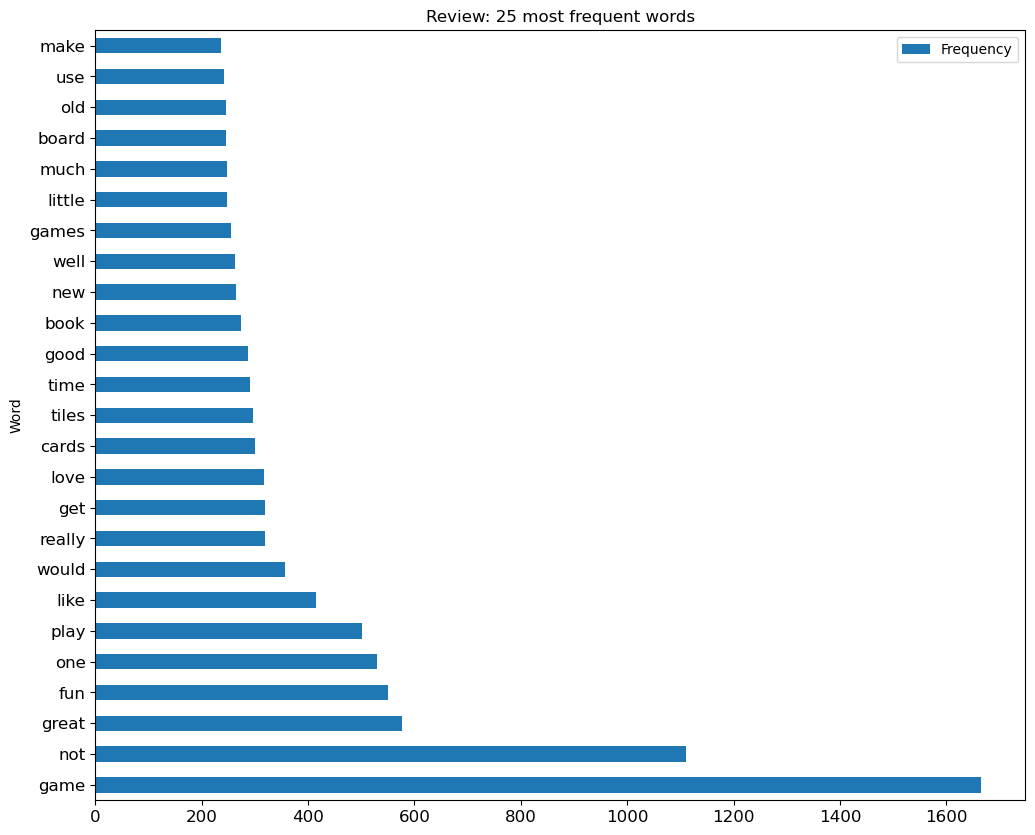

In [131]:
# Visualise frequency of words - Review

ax = review_count.plot(kind = 'barh', figsize = (12, 10), fontsize = 12, colormap = 'tab10')

ax.set_title('Review: 25 most frequent words')

In [132]:
# Filter rows where review contains 'not'

reviews_not = reviews5[reviews5['review'].str.contains('not')] 
reviews_not['review'].shape

(366,)

##### Observation
FREQUENCY OF WORDS IN REVIEW
- Not is the 2nd most popular word and there are quite a few instances of it (366 rows). We kept it in our stopwords because removing it could impact sentiment analysis.
- Looking at this list of individual words is difficult to tell what is important or how people are feeling because the context is removed.
- This chart demonstrates that we may need to increase our stopwords to include for example one, would, get, use and possibly removing 'not' as well.

In [133]:
# Frequency Distribution - Summary

freq_summary = FreqDist(summary_all)

# Display most common words as a dataframe

summary_count = pd.DataFrame(Counter(freq_summary).most_common(25),
                           columns = ['Word', 'Frequency']).set_index('Word')
summary_count

Frequency
Word                
stars            409
five             324
game             319
great            295
fun              218
not               97
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36
product           35
old               34
excellent         32
really            30
set               30
best              29
nice              29
gift              27
little            26

Text(0.5, 1.0, 'Summary: 25 most frequent words')

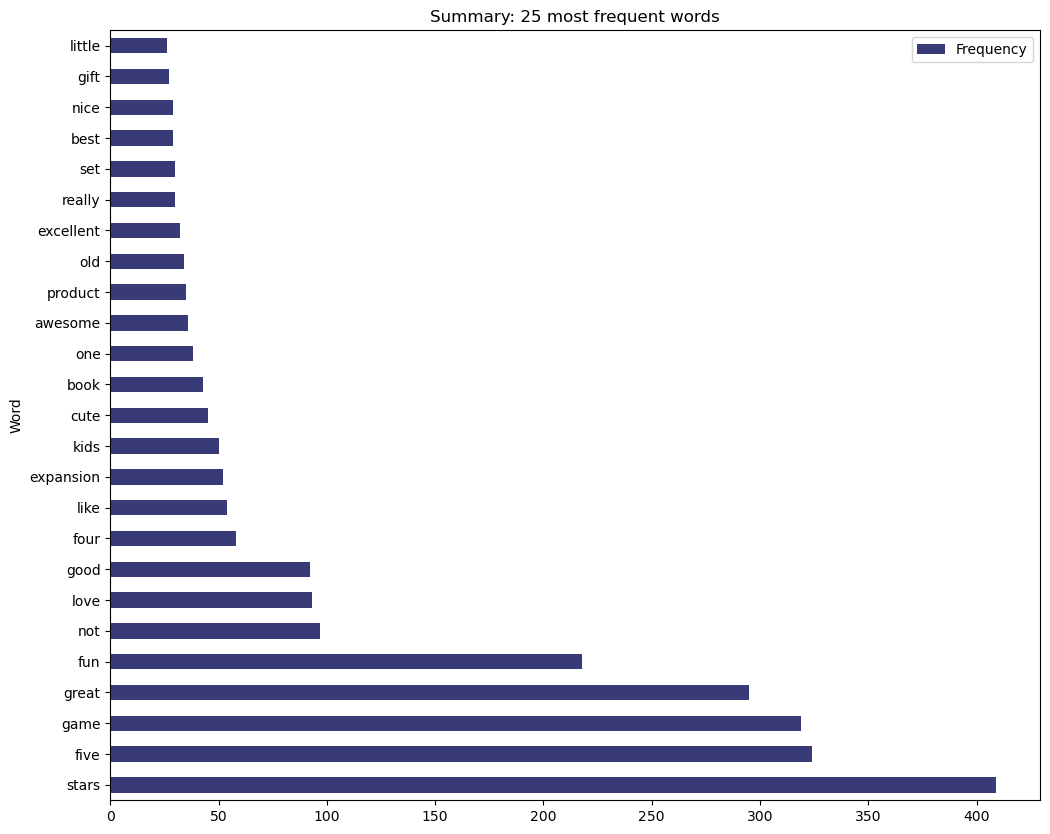

In [134]:
# Visualise frequency of words - Summary

ax = summary_count.plot(kind = 'barh', figsize = (12, 10), fontsize = 10, colormap = 'tab20b')

ax.set_title('Summary: 25 most frequent words')

In [135]:
# Filter rows where Summary contains 'not'

reviews_not = reviews5[reviews5['summary'].str.contains('not')] 
reviews_not['summary'].shape

(45,)

##### Observations
FREQUENCY OF WORDS IN SUMMARY
- Stars is the most commonly used word, followed by five and game.
- Not is the 6th most popular word (while in Review it's second) and it appears on 45 rows. 
- I feel that sentiment analysis using TextBlob or Vader may gave us more useful insight than looking at individual words.
- I also recommend doing further investigation on the rows in both Review and Summary that contain the word 'not' to see if there is an issue that needs resolving.

# Sentiment analysis: TextBlob

In [136]:
# Calculate sentiment analysis (polarity) using TextBlob on sentences

# Function to extract polarity score from the comment
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Create new column with polarity scores for both 'review' and 'summary'
reviews5['polarity_review'] = reviews5['review'].apply(generate_polarity)
reviews5['polarity_summary'] = reviews5['summary'].apply(generate_polarity)

# View results
reviews5.head()

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   
3      3  Amazing buy! Bought it as a gift for our new d...   
4      4  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                        review_clean  \
0  comes dms screen space screen absolute premium...   
1  open letter galeforce9 unpainted miniatures no...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf9s previous screens completely unnece...   

                                       summary_clean  \
0  fact 50 space wasted art not terribly informat...   
1  another worthless dungeon masters screen galef...   
2                         pretty also pretty useless   
3                                         five stars   
4                                         money trap   

                                    tokenised_review  \
0  [comes, dms, screen, space, screen, absolute, ...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panels, fille...   
3     [amazing, buy, bought, gift, new, dm, perfect]   
4  [review, gf9s, previous, screens, completely, ...   

                                   tokenised_summary  polarity_review  \
0  [fact, 50, space, wasted, art, not, terribly, ...        -0.036111   
1  [another, worthless, dungeon, masters, screen,...         0.035952   
2                    [pretty, also, pretty, useless]         0.116640   
3                                      [five, stars]         0.628788   
4                                      [money, trap]        -0.316667   

   polarity_summary  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

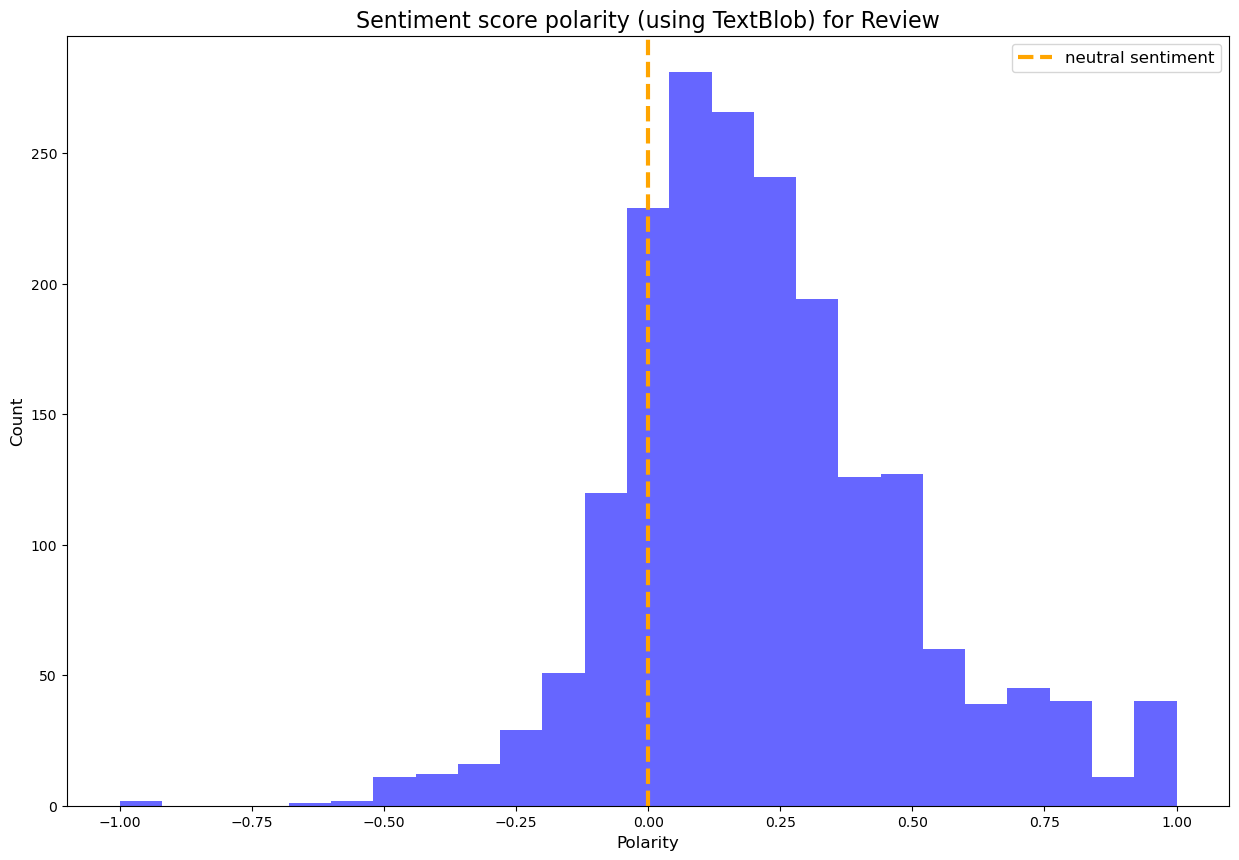

In [137]:
# Create histogram to see sentiment - Review

# Set number of bins
num_bins = 25

# Set plot area
plt.figure(figsize = (15, 10))

# Define bars
n, bins, patches = plt.hist(reviews5['polarity_review'], num_bins, facecolor = 'blue', alpha = 0.6)

# Set labels
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Sentiment score polarity (using TextBlob) for Review', fontsize = 16)
plt.axvline(x = 0, color = 'orange', linewidth = 3, linestyle = '--', label = 'neutral sentiment')
plt.legend(loc = 'upper right', fontsize = 12)

plt.show()

##### Observation
- Most sentences in Review are positive, and only a few have a negative sentiment.
- The distribution is skewed left, which is great news because it means that most customers are generally happy.

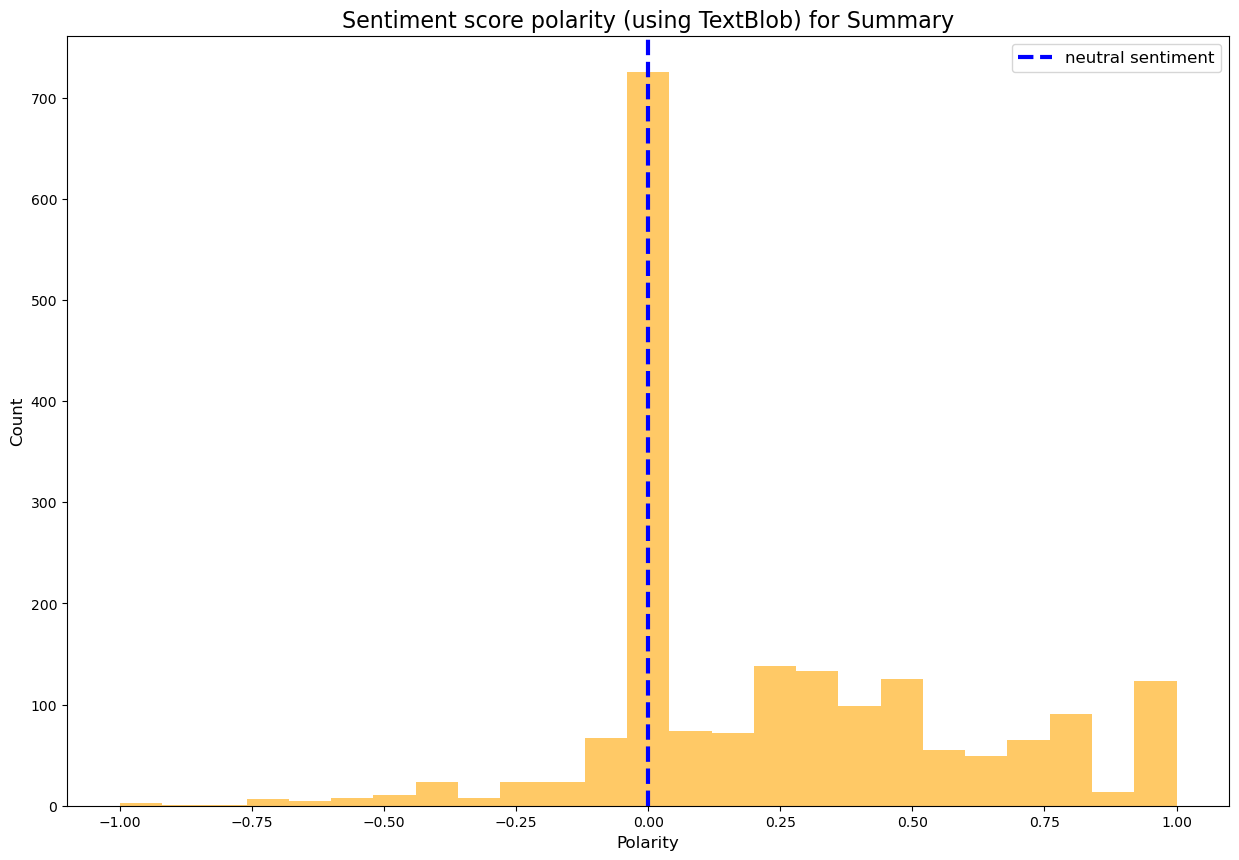

In [138]:
# Create histogram to see sentiment - Summary

# Set number of bins
num_bins = 25

# Set plot area
plt.figure(figsize = (15, 10))

# Define bars
n, bins, patches = plt.hist(reviews5['polarity_summary'], num_bins, facecolor = 'orange', alpha = 0.6)

# Set labels
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Sentiment score polarity (using TextBlob) for Summary', fontsize = 16)
plt.axvline(x = 0, color = 'blue', linewidth = 3, linestyle = '--', label = 'neutral sentiment')
plt.legend(loc = 'upper right', fontsize = 12)

plt.show()

##### Observation
- Most sentences in Summary are neutral in sentiment polarity.
- This is interesting because I would have expected a similar distribution to Review.
- Like Review, the distribution is skewed left with more positive sentiment, than negative.

In [139]:
# Identify top 50 positive statements - Review

# Create a dataframe
positive_review = reviews5.nlargest(50, 'polarity_review')

# Eliminate unnecessary columns
positive_review = positive_review[['review', 'polarity_review']]

# Adjust column width
positive_review.style.set_properties(subset = ['review'], **{'width': '120 0px'})

##### Observations
TOP 50 POSITIVE - REVIEW
- All the top 50 positive review statements are a good fit the TextBlob sentiment polarity score.
- The scores range from 1 to 0.85, indicating a very strong positive sentiment.
- From this list, I would feel comfortable using the sentiment score created for Review.

In [140]:
# Identify top 50 positive statements - Summary

# Create a dataframe
positive_summary = reviews5.nlargest(50, 'polarity_summary')

# Eliminate unnecessary columns
positive_summary = positive_summary[['summary', 'polarity_summary']]

# Adjust column width
positive_summary.style.set_properties(subset = ['summary'], **{'width': '120 0px'})

##### Observations
TOP 50 POSITIVE - SUMMARY
- All have a polarity score of 1 incidating extremely positive sentiment.
- However, when you look more closely at the content, in line 652 'Not the best quality' does not match the polarity score of 1. The model has not understood the sentiment in this case.
- But considering that is only 1 out of 50 (2%) I still feel happy that these sentiments are an accurate reflection of the 50 summary statements (with the exception of 1).

In [141]:
# Identify top 50 negative Review

# Create a dataframe
negative_review = reviews5.nsmallest(50, 'polarity_review')

# Eliminate unnecessary columns
negative_review = negative_review[['review', 'polarity_review']]

# Adjust column width
negative_review.style.set_properties(subset = ['review'], **{'width': '120 0px'})

##### Observations
TOP 50 NEGATIVE - REVIEW
- There are only 2 entries that have a polarity score close to or equal to -1 (extremely negative sentiment).
- And there are quite a few on this list that I would score as positive sentiment.
- While this is frustrating because it indicates that TextBlob Sentiment Analysis is not very accurate, it is positive for Turtle Games because it means that the distribution of positive sentiment is now even higher.
- However, since any negative review are challenges for any company, these should be investigated further.

In [142]:
# Identify top 50 negative Summary

# Create a dataframe
negative_summary = reviews5.nsmallest(50, 'polarity_summary')

# Eliminate unnecessary columns
negative_summary = negative_summary[['summary', 'polarity_summary']]

# Adjust column width
negative_summary.style.set_properties(subset = ['summary'], **{'width': '120 0px'})

##### Observations
TOP 50 NEGATIVE - SUMMARY
- There are 3 instances where the score is -1 and people feel extremely negative.
- Unlike the Review statements, most of the sentiment scores in the top 50 for Summary range from -.75 to -.40, indicating a stronger negative sentiment than with the Review statements.
- There are only 2 instances (4%) where the model has not correctly identified the sentiment of the statement.
- Line 360:	'Anger Control game' (-0.55)
- Line 521: 'Anger Control Game' (-0.55)
- I would suggest that these 2 entries are neutral in sentiment, rather than negative.

# Sentiment analysis: Vader

In [143]:
# Lemmatize Review and Summary columns

# Define the tag map for part of speach (POS) tagging
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Lemmatize the tokens with correct POS tags
lemma_function = WordNetLemmatizer()

# Function that lemmatized word with correct POS for each word in the list
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)]
    return lemmatized_tokens


# Lemmatize Review column
reviews5['lemmatised_review'] = reviews5['tokenised_review'].apply(lemmatize_tokens)

# Lemmatize Summary column
reviews5['lemmatised_summary'] = reviews5['tokenised_summary'].apply(lemmatize_tokens)

# View updated dataframe
reviews5

index                                             review  \
0         0  When it comes to a DM's screen, the space on t...   
1         1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         2  Nice art, nice printing.  Why two panels are f...   
3         3  Amazing buy! Bought it as a gift for our new d...   
4         4  As my review of GF9's previous screens these w...   
...     ...                                                ...   
1938   1995  The perfect word game for mixed ages (with Mom...   
1939   1996  Great game.  Did not think I would like it whe...   
1940   1997  Great game for all.........\nKeeps the mind ni...   
1941   1998                                          fun game!   
1942   1999  This game is fun. A lot like scrabble without ...   

                                                summary  \
0     The fact that 50% of this space is wasted on a...   
1     Another worthless Dungeon Master's screen from...   
2                       pretty, but also pretty useless   
3                                            Five Stars   
4                                            Money trap   
...                                                 ...   
1938     The perfect word game for mixed ages (with Mom   
1939                                          Super fun   
1940                                         Great Game   
1941                                         Four Stars   
1942                                     Love this game   

                                           review_clean  \
0     comes dms screen space screen absolute premium...   
1     open letter galeforce9 unpainted miniatures no...   
2     nice art nice printing two panels filled gener...   
3                amazing buy bought gift new dm perfect   
4     review gf9s previous screens completely unnece...   
...                                                 ...   
1938  perfect word game mixed ages mom perhaps givin...   
1939  great game not think would like first received...   
1940                       great game keeps mind nimble   
1941                                           fun game   
1942  game fun lot like scrabble without little tile...   

                                          summary_clean  \
0     fact 50 space wasted art not terribly informat...   
1     another worthless dungeon masters screen galef...   
2                            pretty also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1938                   perfect word game mixed ages mom   
1939                                          super fun   
1940                                         great game   
1941                                         four stars   
1942                                          love game   

                                       tokenised_review  \
0     [comes, dms, screen, space, screen, absolute, ...   
1     [open, letter, galeforce9, unpainted, miniatur...   
2     [nice, art, nice, printing, two, panels, fille...   
3        [amazing, buy, bought, gift, new, dm, perfect]   
4     [review, gf9s, previous, screens, completely, ...   
...                                                 ...   
1938  [perfect, word, game, mixed, ages, mom, perhap...   
1939  [great, game, not, think, would, like, first, ...   
1940                 [great, game, keeps, mind, nimble]   
1941                                        [fun, game]   
1942  [game, fun, lot, like, scrabble, without, litt...   

                                      tokenised_summary  polarity_review  \
0     [fact, 50, space, wasted, art, not, terribly, ...        -0.036111   
1     [another, worthless, dungeon, masters, screen,...         0.035952   
2                       [pretty, also, pretty, useless]         0.116640   
3                                         [five, stars]         0.628788 

In [144]:
# Join lemmatised words together

# Review
lem_review_all = []

# Add contents of each row from lemmatised_review
for i in range (reviews5.shape[0]):
    lem_review_all = lem_review_all + reviews5['lemmatised_review'][i]    

# Summary
lem_summary_all = []

# Add contents of each row from lemmatised_summary
for i in range (reviews5.shape[0]):
    lem_summary_all = lem_summary_all + reviews5['lemmatised_summary'][i]    

# Convert lists to string
lem_review_st = ' '.join(lem_review_all)
lem_summary_st = ' '.join(lem_summary_all)

In [145]:
# Calculate sentiment using Vader on lemmatised words

# Create SentimentIntensity Analyzer variable
analyse = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def analyse_sentiment(text):
    return analyse.polarity_scores(' '.join(text))

# Calculate sentiment for Review (lemmatised words)
reviews5['sentiment_review_lem'] = reviews5['lemmatised_review'].apply(analyse_sentiment)

# Calculate sentiment for Summary (lemmatised words)
reviews5['sentiment_summary_lem'] = reviews5['lemmatised_summary'].apply(analyse_sentiment)

# View dataframe
reviews5.head()

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   
3      3  Amazing buy! Bought it as a gift for our new d...   
4      4  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                        review_clean  \
0  comes dms screen space screen absolute premium...   
1  open letter galeforce9 unpainted miniatures no...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf9s previous screens completely unnece...   

                                       summary_clean  \
0  fact 50 space wasted art not terribly informat...   
1  another worthless dungeon masters screen galef...   
2                         pretty also pretty useless   
3                                         five stars   
4                                         money trap   

                                    tokenised_review  \
0  [comes, dms, screen, space, screen, absolute, ...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panels, fille...   
3     [amazing, buy, bought, gift, new, dm, perfect]   
4  [review, gf9s, previous, screens, completely, ...   

                                   tokenised_summary  polarity_review  \
0  [fact, 50, space, wasted, art, not, terribly, ...        -0.036111   
1  [another, worthless, dungeon, masters, screen,...         0.035952   
2                    [pretty, also, pretty, useless]         0.116640   
3                                      [five, stars]         0.628788   
4                                      [money, trap]        -0.316667   

   polarity_summary                                  lemmatised_review  \
0              0.15  [come, dms, screen, space, screen, absolute, p...   
1             -0.80  [open, letter, galeforce9, unpainted, miniatur...   
2              0.00  [nice, art, nice, printing, two, panel, fill, ...   
3              0.00          [amaze, buy, buy, gift, new, dm, perfect]   
4              0.00  [review, gf9s, previous, screen, completely, u...   

                                  lemmatised_summary  \
0  [fact, 50, space, waste, art, not, terribly, i...   
1  [another, worthless, dungeon, master, screen, ...   
2                    [pretty, also, pretty, useless]   
3                                       [five, star]   
4                                      [money, trap]   

                                sentiment_review_lem  \
0  {'neg': 0.223, 'neu': 0.675, 'pos': 0.103, 'co...   
1  {'neg': 0.17, 'neu': 0.544, 'pos': 0.286, 'com...   
2  {'neg': 0.203, 'neu': 0.582, 'pos': 0.215, 'co...   
3  {'neg': 0.0, 'neu': 0.284, 'pos': 0.716, 'comp...   
4  {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...   

                               sentiment_summary_lem  
0  {'neg': 0.204, 'neu': 0.583, 'pos': 0.213, 'co...  
1  {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp...  
2  {'neg': 0.275, 'neu': 0.098, 'pos': 0.627, 'co...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'comp...

In [146]:
# Extract individual sentiment scores - Review

reviews5['rev_neg'] = reviews5['sentiment_review_lem'].apply(lambda x: x['neg'])
reviews5['rev_neu'] = reviews5['sentiment_review_lem'].apply(lambda x: x['neu'])
reviews5['rev_pos'] = reviews5['sentiment_review_lem'].apply(lambda x: x['pos'])
reviews5['rev_compound'] = reviews5['sentiment_review_lem'].apply(lambda x: x['compound'])

# Determine overall sentiment

def get_sentiment_label(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
reviews5['review_overall'] = reviews5['rev_compound'].apply(get_sentiment_label)

In [147]:
# Extract individual sentiment scores - Summary

reviews5['sum_neg'] = reviews5['sentiment_summary_lem'].apply(lambda x: x['neg'])
reviews5['sum_neu'] = reviews5['sentiment_summary_lem'].apply(lambda x: x['neu'])
reviews5['sum_pos'] = reviews5['sentiment_summary_lem'].apply(lambda x: x['pos'])
reviews5['sum_compound'] = reviews5['sentiment_summary_lem'].apply(lambda x: x['compound'])

# Determine overall sentiment

def get_sentiment_label(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
reviews5['summary_overall'] = reviews5['sum_compound'].apply(get_sentiment_label)

Text(0.5, 1.0, 'Sentiment analysis using Vader: Review')

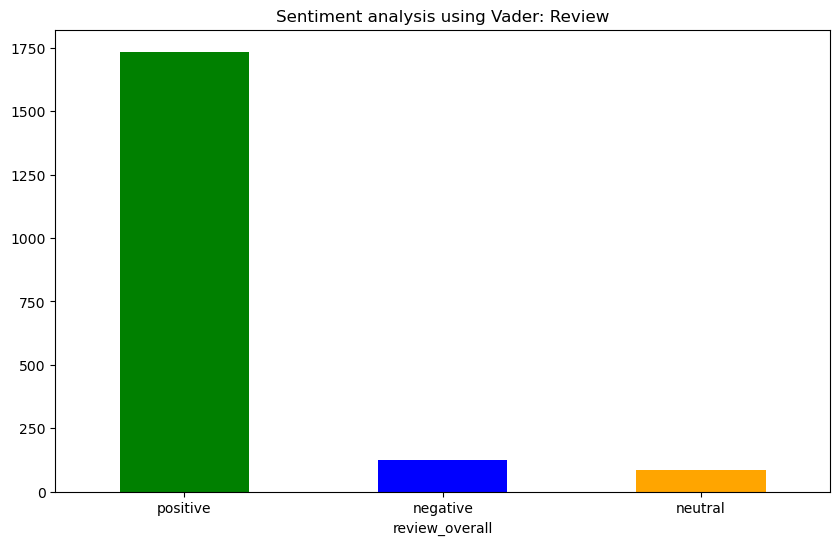

In [148]:
# Visualise sentiment - Review

sentiment_review = reviews5['review_overall']
plt.figure(figsize = (10, 6))
pd.Series(sentiment_review).value_counts().plot(kind = 'bar', color = ['green', 'blue', 'orange'])
plt.xticks(rotation = 0)
plt.title('Sentiment analysis using Vader: Review')

##### Observations
SENTIMENT USING VADAR - REVIEW
- Most of the Review statements have a positive sentiment.
- In comparison, there are very few neutral and negative statements.
- This corresponds to our other analysis using TextBlob.

Text(0.5, 1.0, 'Sentiment analysis using Vader: Summary')

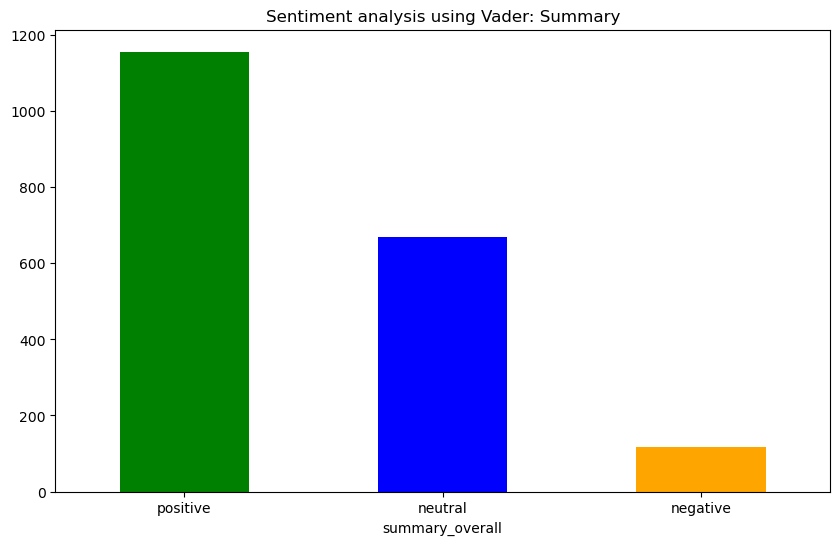

In [149]:
# Visualise sentiment - Summary

sentiment_summary = reviews5['summary_overall']
plt.figure(figsize = (10, 6))
pd.Series(sentiment_summary).value_counts().plot(kind = 'bar', color = ['green', 'blue', 'orange'])
plt.xticks(rotation = 0)
plt.title('Sentiment analysis using Vader: Summary')

##### Observations
SENTIMENT USING VADAR - SUMMARY
- As expected, most summary statements are positive.
- There are more neutral and negative than with the review statements, which is what we saw with the TextBlob analysis.
- Since both review and summary are part of each other, I would expect these values to be more similar than they are.
- Even though we have seen some errors in accuracy, for the most part I feel that sentiment analysis using either Vader or TextBlob is useful.

In [150]:
# Compare sentiment analysis - Review

reviews5[['review', 'polarity_review', 'review_overall']].sort_values('polarity_review', ascending = True)

review  polarity_review  \
206   BOOO  UNLES YOU ARE PATIENT KNOW HOW TO MEASUR...        -1.000000   
180                Incomplete kit!  Very disappointing!        -0.975000   
972   If you, like me, used to play D&D, but now you...        -0.625000   
1761  I'm sorry. I just find this product to be bori...        -0.583333   
360   One of my staff will be using this game soon, ...        -0.550000   
...                                                 ...              ...   
674                                    These are great!         1.000000   
778                                            Perfect!         1.000000   
918                                             Awesome         1.000000   
988                                   Great! Thank you.         1.000000   
791                                             great!!         1.000000   

     review_overall  
206        positive  
180        negative  
972        positive  
1761       negative  
360        negative  
...             ...  
674        positive  
778        positive  
918        positive  
988        positive  
791        positive  

[1943 rows x 3 columns]

In [151]:
# Compare sentiment analysis - Summary

reviews5[['summary', 'polarity_summary', 'summary_overall']].sort_values('polarity_summary', ascending = True)

summary  polarity_summary  \
21                       The worst value I've ever seen              -1.0   
206   BORING UNLESS YOU ARE A CRAFT PERSON WHICH I A...              -1.0   
814                                              Boring              -1.0   
1143  before this I hated running any RPG campaign d...              -0.9   
1     Another worthless Dungeon Master's screen from...              -0.8   
...                                                 ...               ...   
1218                                             Great!               1.0   
1614                      A wonderful reading resource.               1.0   
120                                   Great for a gift!               1.0   
79    They're the perfect size to keep in the car or...               1.0   
988                                              Great!               1.0   

     summary_overall  
21          negative  
206         negative  
814         negative  
1143         neutral  
1           negative  
...              ...  
1218        positive  
1614        positive  
120         positive  
79          positive  
988         positive  

[1943 rows x 3 columns]

##### Observations
COMPARING POLARITY (TEXTBLOB) AND OVERALL SCORE (VADER)
- Looking at a selection of rows from the dataframes, it appears that both TextBlob polarity score and Vader's overall score come to similar conclusions for the most part. 
- There are few instances where the sentiment result differs, in particular for Review.
- This could be because Vader is more suited to shorter social media content, rather than longer sentences we find in Review.